# 0. Khai báo thư viện

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.rcParams["figure.figsize"] = (6, 4)


# 1. Đọc dữ liệu

In [112]:
df = pd.read_csv("StressLevelDataset.csv")

df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# 2.1 Data Collection

## 2.1.1 Chủ đề và bối cảnh thực tiễn của dữ liệu  


Bộ dữ liệu được sử dụng trong đồ án là **StressLevelDataset.csv**, trích xuất từ bộ **Student Stress Monitoring Datasets** trên nền tảng Kaggle. Dữ liệu tập trung vào chủ đề **mức độ căng thẳng (stress)** của học sinh/sinh viên và các yếu tố liên quan đến:

- **Yếu tố tâm lý (psychological factors)**: `anxiety_level`, `depression`, `self_esteem`, `mental_health_history`, …  
- **Yếu tố thể chất/sinh lý (physiological indicators)**: `sleep_quality`, `headache`, `blood_pressure`, `breathing_problem`, …  
- **Yếu tố môi trường (environmental factors)**: `noise_level`, `living_conditions`, `safety`, `basic_needs`, …  
- **Yếu tố học thuật (academic factors)**: `academic_performance`, `study_load`, `teacher_student_relationship`, `future_career_concerns`, …  
- **Yếu tố xã hội (social factors)**: `social_support`, `peer_pressure`, `extracurricular_activities`, `bullying`, …  

Biến mục tiêu **`stress_level`** biểu diễn mức độ căng thẳng tổng thể của từng cá nhân, được mã hóa thành ba nhóm (thấp, trung bình, cao). Mỗi dòng trong dữ liệu tương ứng với **một học sinh/sinh viên**, mỗi cột tương ứng với một chỉ số về trạng thái tâm lý, thể chất, bối cảnh học tập và xã hội.

Trong thực tiễn xã hội hiện tại, vấn đề về bệnh tâm lý của con người, đặc biệt là ở lứa tuổi học sinh, sinh viên đang ngày càng trở thành một hiện trạng đáng chú ý. Và stress - nguyên nhân chủ yếu gây nên bệnh tâm lý cần phải được nghiên cứu và phân tích kỹ lưỡng. Bộ dữ liệu này được thu thập bằng một khảo sát với mục đích tìm hiểu về nguyên do đằng sau sự căng thẳng ở lứa tuổi học sinh, sinh viên.  

Cụ thể, bộ dữ liệu được ghi nhận thông qua một **khảo sát về stress học đường** trong đó người tham gia tự đánh giá, báo cáo về trạng thái của mình. Tập dữ liệu này phản ánh một phần bức tranh thực tế về:

- Áp lực học tập, thi cử, kỳ vọng gia đình và lo lắng về tương lai  
- Ảnh hưởng của các yếu tố môi trường (tiếng ồn, điều kiện sống, an toàn)  
- Tác động của quan hệ xã hội, bắt nạt và hỗ trợ xã hội đối với sức khỏe tinh thần và kết quả học tập.

---

## 2.1.2 Nguồn gốc dữ liệu  

**Nền tảng và đường dẫn:**

- **Nền tảng:** Kaggle  
- **Tên bộ dữ liệu:** *Student Stress Monitoring Datasets*  
- **Đường dẫn đầy đủ:**  
  - https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets  

Trong project này, file được sử dụng là **StressLevelDataset.csv**, được tải trực tiếp từ bộ dữ liệu nói trên.

**Tác giả/nhóm tác giả hoặc tổ chức:**

- Bộ dữ liệu được công bố trên Kaggle bởi tài khoản **Md Sultanul Islam Ovi** (và cộng sự).  
- Sau khi tìm hiểu, bộ dữ liệu này phục vụ cho một bài báo của tác giả, khi truy theo thông tin được trích dẫn trong bài báo thì có dẫn đến trang Kaggle https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data. Đây có vẻ là trang gốc chia sẻ bộ dữ liệu, với tác giả là tài khoản **Chhabii** (Chhabi Acharya).

**Thời điểm công bố / thu thập:**

- Trang Kaggle cho biết bộ dữ liệu được **tạo và cập nhật gần đây (năm 2025)**.  
- Tuy nhiên, trong phần Discussion của trang gốc của tác giả **Chhabii**, tác giả có đề cập thời gian thu thập dữ liệu là từ tháng 6 năm 2022 đến tháng 10 năm 2022.

---

## 2.1.3 Giấy phép sử dụng và tính hợp lệ cho mục đích học thuật  

**Loại giấy phép (license):**

Theo như thông tin trên trang Kaggle của bộ dữ liệu, bộ dữ liệu có giấy phép **Apache License 2.0**.  
Đây là một giấy phép mã nguồn mở rất phổ biến, do Apache Software Foundation phát hành. Giấy phép này cho phép sử dụng, sửa đổi và phân phối bộ dữ liệu khá tự do, kể cả cho mục đích thương mại.  
Tuy nhiên, khi sử dụng bộ dữ liệu cần phải tuân thủ các nguyên tắc là:
- Giữ lại copyright notice.
- Giữ lại LICENSE (Apache 2.0).
- Nếu có chỉnh sửa bộ dữ liệu, phải ghi rõ những thay đổi đã thực hiện.

**Khả năng sử dụng cho mục đích giáo dục:**

- Project này sử dụng dữ liệu **chỉ cho mục đích học thuật trong khuôn khổ môn học CSC17104 – Programming for Data Science**, không phục vụ mục đích thương mại.  
- Việc sử dụng như vậy **phù hợp với phạm vi mà license Apache 2.0 cho phép** (nghiên cứu, học tập, minh họa phương pháp phân tích và mô hình hóa dữ liệu).

**Yêu cầu và hạn chế về ghi công:**

Khi sử dụng dữ liệu, nhóm cam kết:

- Ghi rõ:
  - Tên bộ dữ liệu: *Student Stress Monitoring Datasets*  
  - Nguồn: Kaggle  
  - Tác giả Kaggle: Md Sultanul Islam Ovi (hoặc tác giả Chhabii)  
  - Đường dẫn: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets  
  (hoặc đường dẫn: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis)
- Không tuyên bố đây là dữ liệu do nhóm tự thu thập.  
- Không tái phân phối dữ liệu dưới tên mới mà không trích dẫn nguồn gốc ban đầu.

---

## 2.1.4 Quy trình thu thập dữ liệu  

**Phương pháp thu thập (collection method):**

- Dữ liệu được thu thập thông qua **khảo sát (survey)**, trong đó người tham gia tự điền thông tin về:
  - Mức độ lo âu, trầm cảm, tự trọng và tiền sử sức khỏe tâm thần  
  - Các triệu chứng thể chất thường gặp như đau đầu, vấn đề huyết áp, khó thở  
  - Điều kiện sống và môi trường xung quanh (tiếng ồn, an toàn, nhu cầu cơ bản,…) 
  - Trải nghiệm học tập (kết quả học, khối lượng học, mối quan hệ với giáo viên)
  - Quan hệ xã hội (sự hỗ trợ từ bạn bè/gia đình, áp lực bạn bè, bắt nạt, tham gia hoạt động ngoại khóa).  
- Dữ liệu được thu thập dựa trên các thang đo như sau:
  - Anxiety : Phạm vi từ 0 đến 21, Thang đo : GAD-7
  - Self-esteem : Phạm vi từ 0 đến 30, Thang đo: Rosenberg Self Esteem Scale
  - Mental Health History : 0 nếu không có tiền sử bệnh tâm lý, 1 nếu có tiền sử bệnh tâm lý.
  - Depression : Phạm vi từ 0 đến 27, Thang đo: Patient Health Questionnaire (PHQ-9)
  - Các đặc trưng khác hầu hết có phạm vi từ 0 đến 5 với 0,1 là thấp, 2,3 là trung bình, và 4,5 là cao.

**Đối tượng mục tiêu (target population) và cách lấy mẫu (sampling):**

- Đối tượng được thu thập dữ liệu là **học sinh/sinh viên** thuộc các trường Trung học phổ thông, cao đẳng, đại học ở thành phố Dahran, quốc gia Nepal.
- Theo như tác giả đề cập, họ đến các trường học, cao đẳng để tuyên truyền thông tin về tầm quan trọng của sức khỏe tâm thần cho lứa tuổi học sinh, và đồng thời, họ cũng thực hiện khảo sát này.

**Thời gian thu thập dữ liệu:**

- Thời gian thu thập dữ liệu theo như tác giả **Chhabii** đề cập là trong khoảng từ tháng 6 năm 2022 đến tháng 10 năm 2022.

**Các giới hạn và thiên lệch (limitations and biases):**

Do bản chất là dữ liệu khảo sát tự báo cáo (self-report survey), bộ dữ liệu tiềm ẩn một số dạng thiên lệch:

- **Thiên lệch xã hội (social desirability bias):** người trả lời có thể “làm đẹp” câu trả lời để phù hợp với chuẩn mực xã hội. 
- **Thiên lệch nhớ lại (recall bias):** khó nhớ chính xác tần suất hoặc mức độ nặng của triệu chứng/áp lực.  
- **Thiên lệch chọn mẫu (selection bias):** chỉ những cá nhân có thể tiếp cận khảo sát (ví dụ có Internet, có hứng thú trả lời) mới xuất hiện trong dữ liệu.
- Đồng thời tác giả có nhắc đến, khi thu thập thông tin, hầu hết người tham gia đều không rõ về chỉ số thông tin **blood pressure** của họ, vì vậy thông tin này khá chủ quan và không hoàn toàn đáng tin.
- Thiếu thông tin về:
  - Phân bố nhân khẩu học (giới tính, độ tuổi, khu vực,…);  
  - Tỷ lệ phản hồi (response rate).  

Vì vậy, dù có giá trị lớn cho mục đích **khảo sát, minh họa phương pháp phân tích và xây dựng mô hình**, bộ dữ liệu **không thể xem là đại diện thống kê cho toàn bộ học sinh/sinh viên ở một quốc gia hoặc toàn cầu**.

---

## 2.1.5 Lý do lựa chọn bộ dữ liệu  

Việc lựa chọn **Student Stress Monitoring Datasets** (StressLevelDataset.csv) xuất phát từ cả **động cơ học thuật** lẫn **tính thực tiễn của chủ đề**:

1. **Phù hợp với yêu cầu kỹ thuật của môn học:**
   - Quy mô dữ liệu đáp ứng yêu cầu: khoảng **1.100 quan sát và 21 đặc trưng**, đủ lớn để thực hiện các bước EDA, phân tích thống kê và xây dựng mô hình học máy nhưng vẫn **vừa phải** để xử lý trong một notebook.  
   - Dữ liệu ở dạng **bảng CSV**, tất cả biến là số nguyên/thang điểm → thuận lợi cho tiền xử lý bằng `pandas` và mô hình hóa bằng `scikit-learn`.

2. **Chủ đề có ý nghĩa và gần gũi:**
   - Stress trong học đường là vấn đề mà bản thân các thành viên trong nhóm có thể đồng cảm, từ trải nghiệm cá nhân về áp lực học tập, thi cử, kỳ vọng gia đình,…  
   - Kết quả phân tích có thể được diễn giải một cách dễ hiểu cho người không chuyên, đồng thời gợi mở các hàm ý ứng dụng (ví dụ: tư vấn tâm lý, quản lý học tập, cải thiện môi trường học đường).

3. **Tiềm năng đặt ra nhiều câu hỏi nghiên cứu và insight:**
   - Phân bố và đặc điểm của từng nhóm stress (thấp, trung bình, cao).  
   - Nhận diện các **yếu tố nguy cơ chính** (bullying, future_career_concerns, peer_pressure, depression, anxiety,…) và **yếu tố bảo vệ** (social_support, self_esteem, sleep_quality, safety,…).  
   - Xem xét ảnh hưởng của stress lên **kết quả học tập và trải nghiệm học đường** (academic_performance, teacher_student_relationship, study_load).  
   - Thử nghiệm các **mô hình phân loại đa lớp** (ví dụ: Logistic Regression, Random Forest) để dự đoán `stress_level` và đánh giá khả năng sử dụng mô hình như một công cụ sàng lọc sớm nhóm học sinh/sinh viên có nguy cơ stress cao.

Tóm lại, bộ dữ liệu này vừa đáp ứng đầy đủ **yêu cầu về mặt kỹ thuật** của đồ án, vừa mang lại **giá trị nội dung** khi giúp nhóm tiếp cận một vấn đề thực tế, có ý nghĩa xã hội và có thể triển khai nhiều hướng phân tích khác nhau trong khuôn khổ môn học.


# 2.2 Data Exploration (Khám phá dữ liệu)

Mục tiêu của phần này là **hiểu rõ cấu trúc, chất lượng và đặc điểm** của bộ dữ liệu StressLevelDataset, từ đó:

- Đánh giá mức độ “sạch” (data quality) của dữ liệu;
- Phát hiện các vấn đề tiềm ẩn (thiếu dữ liệu, outlier, mã hóa không nhất quán,…);
- Nhận diện các pattern sơ bộ và quan hệ giữa biến giải thích và biến mục tiêu `stress_level`;
- Đề xuất các bước tiền xử lý (preprocessing) cần thiết cho các phân tích và mô hình hóa ở các phần sau.


## 2.2.1 Tổng quan tập dữ liệu (Dataset Overview)

In [113]:
print("Kích thước dữ liệu (số dòng, số cột):", df.shape)

print("\nThông tin kiểu dữ liệu và non-null:")
df.info()

Kích thước dữ liệu (số dòng, số cột): (1100, 21)

Thông tin kiểu dữ liệu và non-null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  acad



**Các thông tin cơ bản:**

- Số dòng: **1100**  
- Số cột: **21**  
- Mỗi dòng biểu diễn: **một học sinh/sinh viên** tham gia khảo sát, với:
  - Các biến mô tả trạng thái tâm lý, thể chất, môi trường sống, học tập và xã hội;
  - Biến mục tiêu `stress_level` biểu diễn mức độ căng thẳng tổng thể.
- Kích thước dữ liệu: khoảng **1100 × 21 ≈ 23.100 giá trị**.

---



## 2.2.2 Tính toàn vẹn dữ liệu (Data Integrity)

Trong bước này, mục tiêu là đánh giá:

- Mức độ trùng lặp (duplicate records);
- Sự tồn tại của các dòng hoàn toàn rỗng;
- Mức độ đầy đủ (completeness) của các biến.

In [114]:


print("\nThống kê mô tả cơ bản:")
display(df.describe().T)

# Kiểm tra trùng lặp và dòng rỗng
so_dong_trung_lap = df.duplicated().sum()
so_dong_rong = (df.isna().sum(axis=1) == df.shape[1]).sum()

print("\nSố dòng trùng lặp:", so_dong_trung_lap)
print("Số dòng hoàn toàn rỗng:", so_dong_rong)

print("\nSố lượng giá trị thiếu (NaN) theo từng cột:")
display(df.isna().sum())



Thống kê mô tả cơ bản:


,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0



Số dòng trùng lặp: 0
Số dòng hoàn toàn rỗng: 0

Số lượng giá trị thiếu (NaN) theo từng cột:


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Kết quả kiểm tra cho thấy:

- **Không có dòng trùng lặp** 
- **Không có dòng hoàn toàn rỗng**
- **Không có giá trị thiếu (missing)** 

Điều này kết luận rằng **tập dữ liệu có tính toàn vẹn rất tốt** ở mức độ cấu trúc (hàng/cột), và **không cần thực hiện các thao tác loại bỏ dòng trùng lặp hay xử lý giá trị thiếu** trong giai đoạn tiền xử lý cơ bản.

## 2.2.3 Kiểm kê cột (Column Inventory)

Bộ dữ liệu gồm 21 cột, toàn bộ đều là **biến số nguyên (int)**, nhưng về ý nghĩa có thể chia thành 4 nhóm chính:

| Cột                               | Ý nghĩa khái quát                                                                                   | Nhóm yếu tố         | Ghi chú phân tích                    |
|-----------------------------------|------------------------------------------------------------------------------------------------------|---------------------|--------------------------------------|
| `anxiety_level`                   | Mức độ lo âu (anxiety)                                                                              | Tâm lý              | Thang điểm (0–21) - Thang đo GAD-7 |
| `self_esteem`                     | Mức độ tự trọng (self-esteem)                                                                       | Tâm lý              | Thang điểm (0–30) - Thang đo Rosenberg Self Esteem Scale  |
| `mental_health_history`           | Có/không tiền sử vấn đề sức khoẻ tâm thần                                                           | Tâm lý              | Nhị phân 0/1 – categorical           |
| `depression`                      | Mức độ trầm cảm                                                                                     | Tâm lý              | Thang điểm (0–27) - Thang đo Patient Health Questionnaire (PHQ-9) |
| `headache`                        | Mức độ đau đầu                                                                                      | Thể chất            | Thang Likert 0–5                     |
| `blood_pressure`                  | Vấn đề liên quan đến huyết áp                                                                       | Thể chất            | Thang Likert 1–3                     |
| `sleep_quality`                   | Chất lượng giấc ngủ                                                                                 | Thể chất            | Thang Likert 0–5                     |
| `breathing_problem`               | Mức độ vấn đề về hô hấp                                                                             | Thể chất            | Thang Likert 0–5                     |
| `noise_level`                     | Mức độ tiếng ồn trong môi trường sống/học tập                                                       | Môi trường          | Thang Likert 0–5                     |
| `living_conditions`               | Đánh giá điều kiện sống tổng quát                                                                   | Môi trường          | Thang Likert 0–5                     |
| `safety`                          | Cảm nhận về mức độ an toàn                                                                          | Môi trường          | Thang Likert 0–5                     |
| `basic_needs`                     | Khả năng đáp ứng nhu cầu cơ bản (ăn, ở, chi phí)                                                    | Môi trường          | Thang Likert 0–5                     |
| `academic_performance`            | Mức độ hài lòng với kết quả học tập                                                                 | Học tập             | Thang Likert 0–5                     |
| `study_load`                      | Cảm nhận về khối lượng học tập                                                                      | Học tập             | Thang Likert 0–5                     |
| `teacher_student_relationship`    | Chất lượng quan hệ thầy–trò                                                                         | Học tập/xã hội      | Thang Likert 0–5                     |
| `future_career_concerns`          | Mức độ lo lắng về sự nghiệp tương lai                                                               | Học tập/tâm lý      | Thang Likert 0–5                     |
| `social_support`                  | Mức độ cảm nhận được hỗ trợ xã hội (gia đình, bạn bè, cộng đồng)                                   | Xã hội              | Thang Likert 0–5                     |
| `peer_pressure`                   | Mức độ áp lực từ bạn bè                                                                             | Xã hội              | Thang Likert 0–5                     |
| `extracurricular_activities`      | Mức độ tham gia hoạt động ngoại khóa                                                               | Xã hội              | Thang Likert 0–5                     |
| `bullying`                        | Mức độ trải nghiệm bắt nạt                                                                          | Xã hội (tiêu cực)   | Thang Likert 0–5                     |
| `stress_level`                    | Mức độ stress tổng thể (0 = thấp, 1 = trung bình, 2 = cao)                                         | Biến mục tiêu       | Categorical (ordinal)                |

**Các cột liên quan cho phân tích:**

- Hầu như **tất cả các cột** đều mang ý nghĩa và tiềm năng giải thích `stress_level`, nên **được giữ lại**.  
- Không có cột “ID” hoặc cột kỹ thuật nào cần loại bỏ.

Trong các bước phân tích và mô hình hóa sau:

- `stress_level` sẽ được xử lý như **biến mục tiêu phân loại đa lớp (multiclass classification)**;  
- `mental_health_history` và `stress_level` có thể được xem là **categorical** trong một số trực quan hóa (bar chart, crosstab);  
- Các cột còn lại là **numeric ordinal**, phù hợp để tính thống kê mô tả, tương quan và dùng làm feature trong mô hình ML.


## 2.2.4 Kiểu dữ liệu (Data Types)


In [115]:
df.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


Kết quả `df.dtypes` cho thấy:

- Tất cả 21 cột đều có kiểu **`int64`** trong pandas.  
- Về mặt ý nghĩa:
  - `stress_level` và `mental_health_history` là **biến phân loại (categorical)** được mã hóa dưới dạng số nguyên;  
  - Các biến còn lại là **biến ordinal** (thang đo Likert hoặc thang điểm) nhưng có thể xử lý như **numeric** trong hầu hết các phép tính thống kê và mô hình hóa.

**Nhận xét về type conversion:**

- Không có cột nào thuộc kiểu `object` hay `string` nên **không có lỗi kiểu dữ liệu hiển nhiên**;  
- Tùy mục đích trực quan hóa và phân tích:
  - Có thể chuyển `stress_level` sang `category` để biểu diễn rõ bản chất phân loại:  
    ```python
    df["stress_level"] = df["stress_level"].astype("category")
    ```
  - Tương tự, `mental_health_history` cũng có thể chuyển sang `category`.




In [116]:
cols_quan_tam = [
    "anxiety_level", "self_esteem", "depression",
    "sleep_quality", "academic_performance", "bullying"
]

for col in cols_quan_tam:
    s = df[col]
    print(f"--- {col} ---")
    print("Min:", s.min(), "Max:", s.max())
    print("Mean:", round(s.mean(), 2), "Median:", s.median(), "Std:", round(s.std(), 2))
    print("Skewness:", round(s.skew(), 2))
    print()


--- anxiety_level ---
Min: 0 Max: 21
Mean: 11.06 Median: 11.0 Std: 6.12
Skewness: -0.08

--- self_esteem ---
Min: 0 Max: 30
Mean: 17.78 Median: 19.0 Std: 8.94
Skewness: -0.4

--- depression ---
Min: 0 Max: 27
Mean: 12.56 Median: 12.0 Std: 7.73
Skewness: 0.22

--- sleep_quality ---
Min: 0 Max: 5
Mean: 2.66 Median: 2.5 Std: 1.55
Skewness: 0.18

--- academic_performance ---
Min: 0 Max: 5
Mean: 2.77 Median: 2.0 Std: 1.41
Skewness: 0.18

--- bullying ---
Min: 0 Max: 5
Mean: 2.62 Median: 3.0 Std: 1.53
Skewness: 0.18



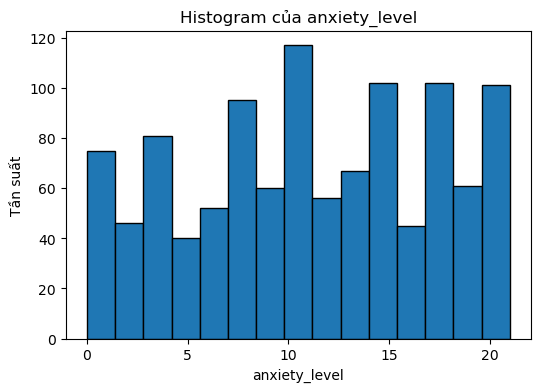

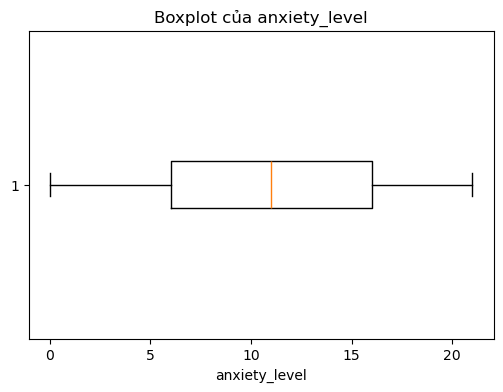

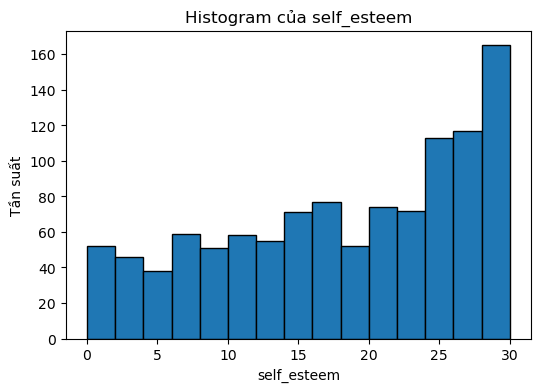

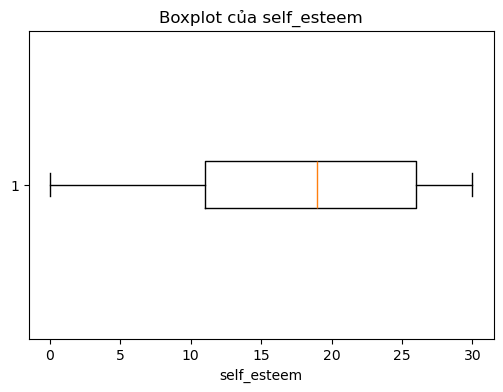

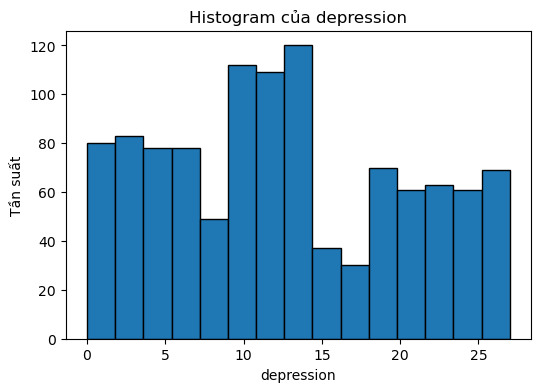

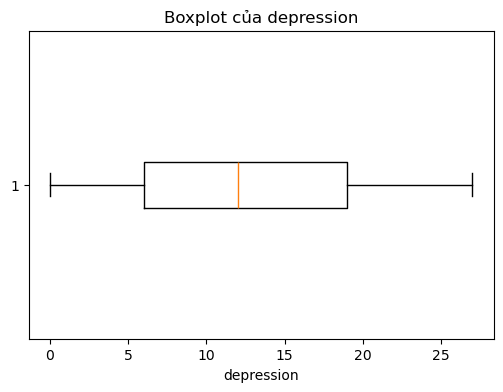

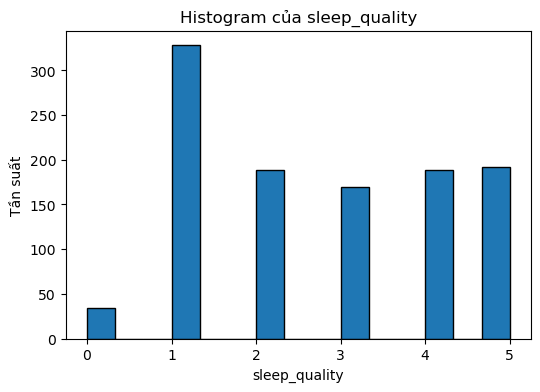

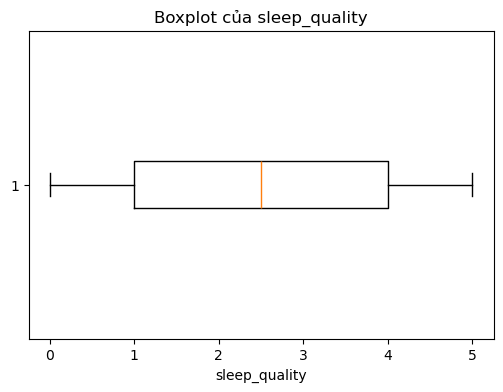

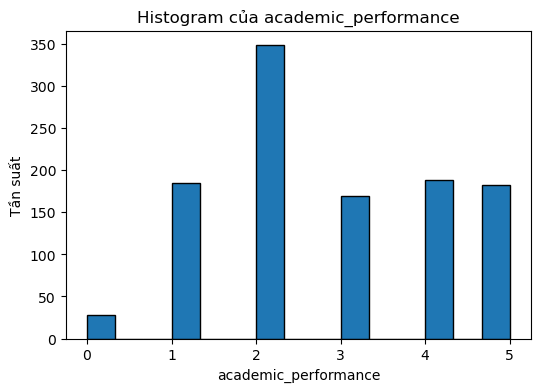

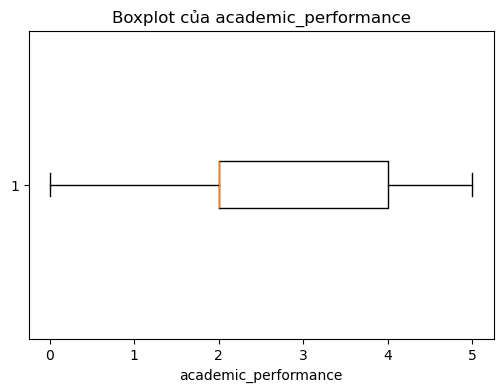

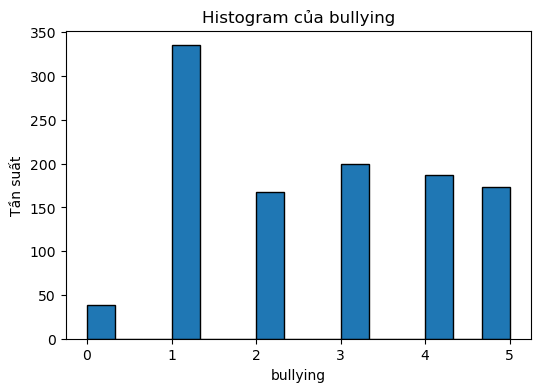

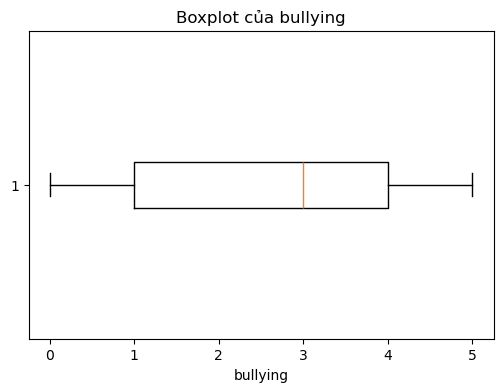

In [117]:
for col in cols_quan_tam:
    # Histogram
    plt.hist(df[col], bins=15, edgecolor="black")
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()
    
    # Boxplot
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot của {col}")
    plt.xlabel(col)
    plt.show()


### 2.2.5 Phân tích các biến số (Numerical Columns Analysis)

**Phân phối & khuynh hướng trung tâm:**


- `anxiety_level`:
  - Min = 0, Max = 21, Mean ≈ 11.06, Median = 11, Std ≈ 6.12, Skew ≈ -0.08  
  → Phân phối khá đối xứng quanh trung tâm, không lệch mạnh.

- `self_esteem`:
  - Min = 0, Max = 30, Mean ≈ 17.78, Median = 19, Skew ≈ -0.40  
  → Hơi lệch trái (một phần cá nhân có tự trọng khá cao).

- `depression`:
  - Min = 0, Max = 27, Mean ≈ 12.56, Median = 12, Skew ≈ 0.22  
  → Phân phối khá đối xứng, hơi lệch phải nhẹ.

- Các biến thang Likert 0–5 (`sleep_quality`, `bullying`, `peer_pressure`,…):
  - Dao động trong khoảng hẹp 0–5, phân phối thường unimodal, có khuynh hướng gần trung tâm.

Nhìn chung, do dữ liệu chủ yếu là **thang điểm hữu hạn**, đa số các biến có phân phối **unimodal, tương đối cân đối**, không có skewness cực đoan.

**Khoảng giá trị & outliers:**

- Các giá trị min/max đều nằm trong **phạm vi thang đo hợp lý**:
  - Ví dụ: 0–21 cho `anxiety_level`, 0–27 cho `depression`, 0–30 cho `self_esteem`, 0–5 cho các thang Likert.  
- Không xuất hiện giá trị “vô lý” (như âm, >30,…) nên **không có dấu hiệu lỗi nhập liệu** rõ ràng.  
- Nếu áp dụng IQR hay z-score, một số giá trị sát biên (ví dụ rất cao về `bullying` hoặc rất thấp về `self_esteem`) có thể bị đánh dấu là outlier thống kê, nhưng về mặt nội dung chúng là **giá trị cực trị hợp lệ** (extreme but plausible), phản ánh những trường hợp stress rất cao.

**Chất lượng dữ liệu số:**

- Tỉ lệ missing ở tất cả các biến số: **0%**.  
- Không có giá trị âm hoặc giá trị vượt quá phạm vi thang đo, **không phát hiện placeholder** kiểu 999, -1,… trong các biến số.  
- Kết luận: dữ liệu số có **chất lượng rất tốt**, đủ tin cậy để sử dụng trong phân tích và mô hình hóa mà không cần bước làm sạch nặng.


## 2.2.6 Phân tích các biến phân loại (Categorical Columns Analysis)

Bộ dữ liệu không có cột kiểu `object`/`string`, tuy nhiên về bản chất có 2 biến phân loại:

1. **`stress_level`** – biến mục tiêu:
   - Giá trị: 0 (thấp), 1 (trung bình), 2 (cao).
   - Mỗi giá trị đại diện cho một mức độ căng thẳng tổng thể.

2. **`mental_health_history`**:
   - Giá trị: 0 (không có tiền sử vấn đề sức khỏe tâm thần), 1 (có tiền sử).
   - Bản chất là biến nhị phân (binary categorical).

Các biến này được lưu dưới dạng số nguyên, nhưng khi phân tích phân phối hay vẽ biểu đồ, ta coi chúng là **categorical variables**.


Phân phối stress_level:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64
stress_level
0    33.9
1    32.5
2    33.5
Name: proportion, dtype: float64

Phân phối mental_health_history:
mental_health_history
0    558
1    542
Name: count, dtype: int64
mental_health_history
0    50.7
1    49.3
Name: proportion, dtype: float64


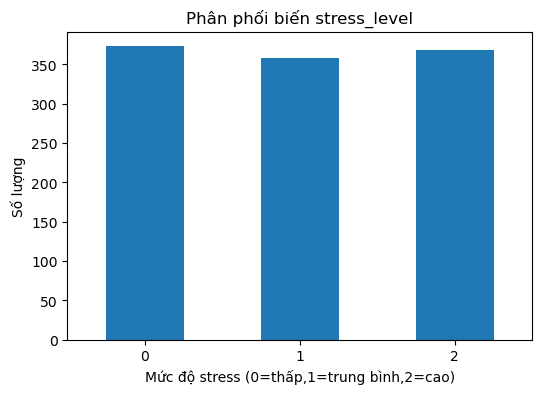

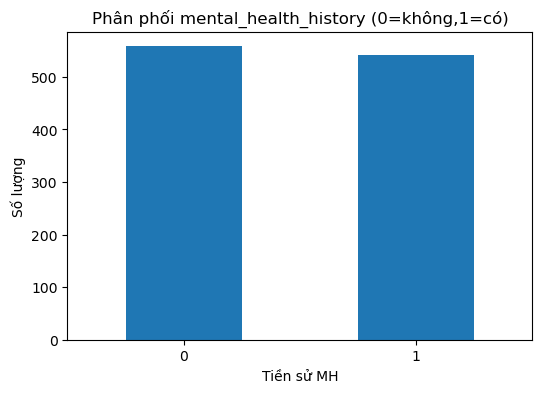

In [118]:
# Phân phối giá trị stress_level và mental_health_history

print("Phân phối stress_level:")
print(df["stress_level"].value_counts().sort_index())
print((df["stress_level"].value_counts(normalize=True).sort_index() * 100).round(1))

print("\nPhân phối mental_health_history:")
print(df["mental_health_history"].value_counts().sort_index())
print((df["mental_health_history"].value_counts(normalize=True).sort_index() * 100).round(1))

# Bar chart cho stress_level
df["stress_level"].value_counts().sort_index().plot(kind="bar")
plt.title("Phân phối biến stress_level")
plt.xlabel("Mức độ stress (0=thấp,1=trung bình,2=cao)")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.show()

# Bar chart cho mental_health_history
df["mental_health_history"].value_counts().sort_index().plot(kind="bar")
plt.title("Phân phối mental_health_history (0=không,1=có)")
plt.xlabel("Tiền sử MH")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.show()


**Kết quả và nhận xét:**

- `stress_level`:
  - 0 (thấp): 373 quan sát (~33.9%)  
  - 1 (trung bình): 358 quan sát (~32.5%)  
  - 2 (cao): 369 quan sát (~33.5%)  
  → Phân phối **rất cân bằng** giữa 3 mức, thuận lợi cho bài toán phân loại (không bị class imbalance nghiêm trọng).

- `mental_health_history`:
  - 0 (không tiền sử): 558 quan sát (~50.7%)  
  - 1 (có tiền sử): 542 quan sát (~49.3%)  
  → Phân phối gần như cân bằng 50/50.

**Chất lượng dữ liệu phân loại:**

- Không có giá trị thiếu;  
- Không có mã hóa không nhất quán (không tồn tại các biến thể như “M”, “m”, “Male”,… vì tất cả đều là số 0/1/2);  
- Không có category hiếm chỉ xuất hiện vài lần – các nhóm đều có số lượng đáng kể (≥ 350 đối với `stress_level`).

Kết luận: các biến phân loại có **phân phối tốt (đồng đều)**, **không cần gộp nhóm** thêm hay sửa lỗi mã hóa.


## 2.2.7 Missing Data Analysis

In [119]:
# 2.2.7 Missing Data Analysis

missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
})

missing_summary


,missing_count,missing_pct
anxiety_level,0,0.0
self_esteem,0,0.0
mental_health_history,0,0.0
depression,0,0.0
headache,0,0.0
blood_pressure,0,0.0
sleep_quality,0,0.0
breathing_problem,0,0.0
noise_level,0,0.0
living_conditions,0,0.0


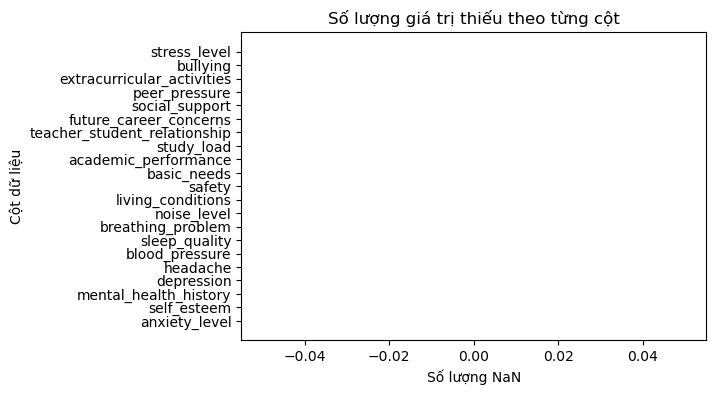

In [120]:
# Bar chart tóm tắt missing (sẽ toàn 0 nhưng vẫn minh họa quy trình)

plt.barh(missing_summary.index, missing_summary["missing_count"])
plt.title("Số lượng giá trị thiếu theo từng cột")
plt.xlabel("Số lượng NaN")
plt.ylabel("Cột dữ liệu")
plt.show()


**Tổng quan:**

- Kết quả `missing_summary` cho thấy:
  - `missing_count = 0` cho tất cả 21 cột;
  - `missing_pct = 0%` cho mọi biến.
- Biểu đồ thanh (bar chart) cũng xác nhận **không có missing values** trong toàn bộ dataset.

**Đánh giá:**

- Không tồn tại pattern thiếu dữ liệu theo cột hoặc theo nhóm quan sát.  
- Không cần xây dựng chiến lược imputation (điền giá trị thiếu) hay loại bỏ dòng vì missing.

Điều này giúp đơn giản hóa đáng kể bước tiền xử lý: ta có thể **tập trung vào phân tích và mô hình** mà không cần lo ngại về việc ước lượng lại dữ liệu thiếu.


## 2.2.8 Quan hệ & tương quan (Relationships & Correlations)

In [121]:


# Ma trận tương quan giữa các biến số
corr_matrix = df.corr(numeric_only=True)

# Tương quan với stress_level
corr_stress = corr_matrix["stress_level"].sort_values(ascending=False)
corr_stress


stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64

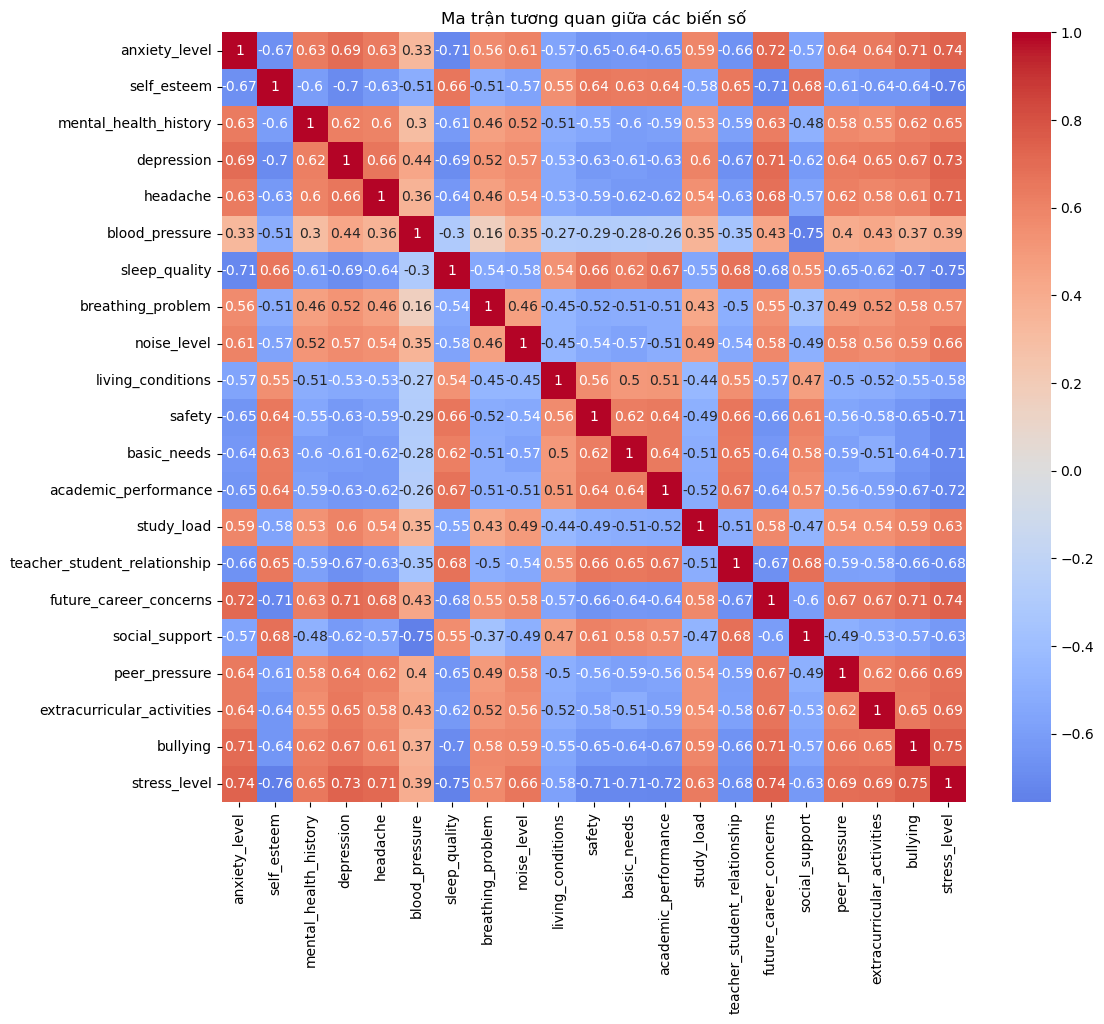

In [122]:
# Heatmap tương quan có hiện chỉ số tương quan, kích thước ảnh to ra xíu
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
seaborn.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

plt.title("Ma trận tương quan giữa các biến số")
plt.show()

Top tương quan dương với stress_level:


bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
study_load                    0.634156
Name: stress_level, dtype: float64


Top tương quan âm với stress_level:


breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64

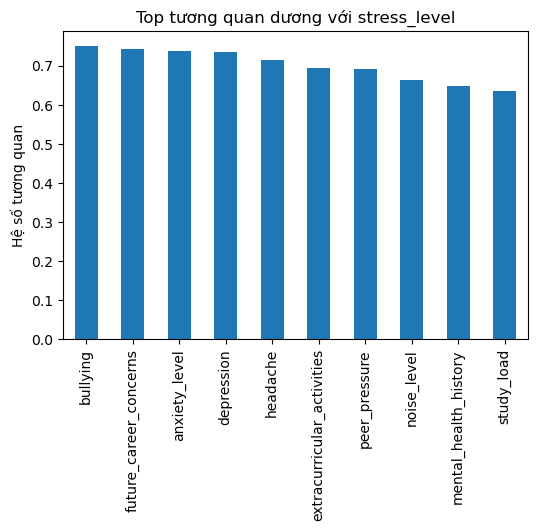

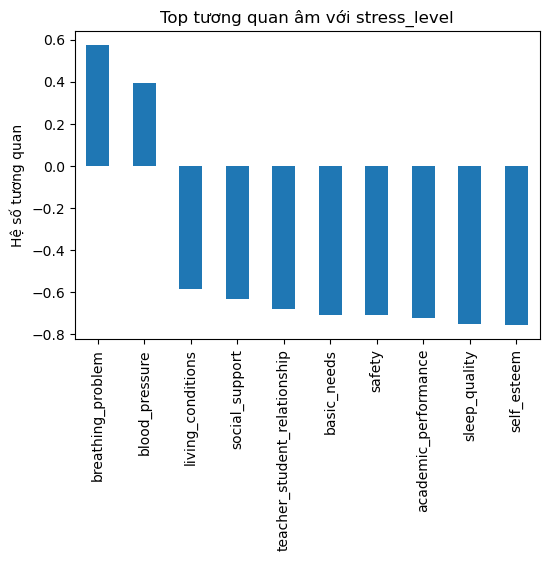

In [ ]:
# Top các biến tương quan dương và âm mạnh nhất với stress_level

top_pos = corr_stress[1:11]  
top_neg = corr_stress[-10:]

print("Top tương quan dương với stress_level:")
display(top_pos)

print("\nTop tương quan âm với stress_level:")
display(top_neg)

top_pos.plot(kind="bar")
plt.title("Top tương quan dương với stress_level")
plt.ylabel("Hệ số tương quan")
plt.show()

top_neg.plot(kind="bar")
plt.title("Top tương quan âm với stress_level")
plt.ylabel("Hệ số tương quan")
plt.show()


In [124]:
pd.crosstab(df["stress_level"], df["mental_health_history"])


mental_health_history,0,1
stress_level,,
0,335,38
1,183,175
2,40,329


**Tương quan với stress_level:**

- Các biến có tương quan **dương mạnh** với `stress_level`:
  - `bullying` ≈ 0.75  
  - `future_career_concerns` ≈ 0.74  
  - `anxiety_level` ≈ 0.74  
  - `depression` ≈ 0.73  
  - `headache` ≈ 0.71  
  - `extracurricular_activities` ≈ 0.69  
  - `peer_pressure` ≈ 0.69  
  - `noise_level` ≈ 0.66  
  - `mental_health_history` ≈ 0.65  
  → Các yếu tố liên quan tới **lo âu, trầm cảm, đau đầu, áp lực bạn bè, bullying, lo lắng về sự nghiệp, môi trường tiếng ồn cao** có xu hướng **tăng mạnh khi stress tăng**.

- Các biến có tương quan **âm mạnh** với `stress_level`:
  - `self_esteem` ≈ -0.76  
  - `sleep_quality` ≈ -0.75  
  - `academic_performance` ≈ -0.72  
  - `safety` ≈ -0.71  
  - `basic_needs` ≈ -0.71  
  - `teacher_student_relationship` ≈ -0.68  
  - `social_support` ≈ -0.63  
  - `living_conditions` ≈ -0.58  
  → Các yếu tố như **tự trọng cao, ngủ tốt, kết quả học tập tốt, cảm giác an toàn, nhu cầu cơ bản được đáp ứng, quan hệ thầy–trò tốt, hỗ trợ xã hội tốt, điều kiện sống tốt** có xu hướng **giảm khi stress tăng**, tức là đóng vai trò **yếu tố bảo vệ**.

**Cross-tab minh họa (stress_level × mental_health_history):**

- Nhóm stress thấp (0): phần lớn **không có tiền sử** MH (335/373).  
- Nhóm stress cao (2): phần lớn **có tiền sử** MH (329/369).  

Điều này gợi ý một mối liên hệ mạnh giữa **tiền sử vấn đề sức khỏe tâm thần** và **mức độ stress hiện tại**.

Nhìn chung, các quan hệ thu được hoàn toàn hợp lý về mặt lý thuyết (theory-consistent) và hỗ trợ việc xây dựng các câu hỏi nghiên cứu và mô hình dự đoán ở các phần sau.


## 2.2.9 Nhận xét ban đầu & Red Flags

### (1) Các quan sát chính 

1. **Stress được phân bố khá cân bằng**: mỗi mức `stress_level` (0, 1, 2) chiếm khoảng 1/3 mẫu, rất thuận lợi cho bài toán phân loại đa lớp.  
2. Nhóm **stress cao** có đặc trưng rất rõ ràng:
   - Lo âu và trầm cảm cao, tự trọng thấp, giấc ngủ kém;  
   - Kết quả học tập thấp, bị bắt nạt và chịu áp lực bạn bè nhiều, nhận ít hỗ trợ xã hội, ít cảm giác an toàn.  
3. Các yếu tố nguy cơ chủ đạo liên quan tới stress gồm:
   - Bullying, peer pressure, future_career_concerns, anxiety, depression, headache, noise_level, mental_health_history.  
4. Các yếu tố bảo vệ quan trọng gồm:
   - Self_esteem, sleep_quality, academic_performance, safety, basic_needs, social_support, teacher_student_relationship, living_conditions.  
5. Dữ liệu **rất sạch**: không thiếu, không trùng lặp, không có giá trị bất thường vượt ra khỏi phạm vi thang đo.

### (2) Các vấn đề chất lượng dữ liệu (Data quality issues)

- Không phát hiện lỗi rõ ràng về:
  - Giá trị thiếu, giá trị âm, giá trị placeholder (999, -1, …),  
  - Dòng rỗng, trùng lặp, hay sai lệch đơn vị.  
- Hạn chế chủ yếu là:
  - Biến ordinal (thang Likert) được biểu diễn dưới dạng số nguyên, cần cẩn trọng khi diễn giải như biến continuous;  
  - Thiếu thông tin meta (giới tính, tuổi, trường, khu vực, thời gian khảo sát).

### (3) Các bước tiền xử lý cần thiết

- Không cần xử lý missing hoặc duplicate.  
- Có thể thực hiện:
  - Chuẩn hóa/standardize các biến số (đặc biệt là khi sử dụng Logistic Regression, SVM,…);  
  - Chuyển một số biến sang kiểu `category` cho mục đích trực quan hóa;  
  - Có thể tạo thêm các biến nhóm (ví dụ: nhóm chất lượng giấc ngủ thấp/trung bình/cao) để phân tích sâu.

### (4) Các pattern thú vị dẫn tới câu hỏi nghiên cứu

- Mối liên hệ mạnh giữa **bullying / peer_pressure** và `stress_level`.  
- Vai trò quan trọng của **self_esteem** và **sleep_quality** như các yếu tố bảo vệ.  
- Mối liên hệ giữa `stress_level` và `academic_performance`, gợi ý câu hỏi về tác động của stress lên kết quả học tập.  
- Liên hệ giữa tiền sử sức khỏe tâm thần (`mental_health_history`) và stress hiện tại.

### (5) Red flags và hạn chế

- **Về dữ liệu:** 
  - Không có red flag lớn về chất lượng dữ liệu thuần túy.  
- **Về khả năng suy rộng:**
  - Mẫu khảo sát là self-report, có thể thiên lệch;  
  - Không biết rõ cách chọn mẫu, bối cảnh trường/lớp, thời gian khảo sát;  
  - Do đó, các kết luận nên được hiểu là **mô tả cho tập dữ liệu này**, không khẳng định đại diện cho toàn bộ học sinh/sinh viên trong thực tế.

Những kết quả EDA này sẽ là nền tảng để xây dựng **các câu hỏi nghiên cứu cụ thể ở mục 2.3** và **các mô hình dự đoán ở mục 2.4**.


# 2.3 Question Formulation

Trong mục này, nhóm xây dựng các câu hỏi nghiên cứu dựa trên bộ dữ liệu StressLevelDataset. Mỗi câu hỏi đều:

- Có ý nghĩa thực tiễn hoặc lý thuyết rõ ràng   
- Yêu cầu nhiều bước xử lý, phân tích, trực quan hóa và diễn giải 
- Có thể được trả lời trong phạm vi dữ liệu hiện có.

---

## Q1. Phân bố và chân dung các mức độ stress

### 1. The Question

Mức độ căng thẳng (`stress_level`) của học sinh/sinh viên được phân bố như thế nào
giữa các nhóm (thấp, trung bình, cao), và chân dung điển hình của từng nhóm stress ra
sao, xét trên các yếu tố về tâm lý, thể chất, môi trường sống, học tập và xã hội?

Nói cách khác:

> Có thể mô tả và so sánh đặc trưng trung bình của các nhóm stress thấp, trung bình,
> cao dựa trên các biến như `anxiety_level`, `depression`, `self_esteem`,
> `sleep_quality`, `academic_performance`, `bullying`, `social_support`,… hay không?



### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Đây là bước đầu tiên để hiểu “bức tranh tổng thể” về stress trong mẫu dữ liệu.
  - Việc biết mỗi nhóm stress trông như thế nào giúp nhận diện đối tượng nguy cơ stress
    cao/thấp trong thực tế.
- **Lợi ích mang lại:**  
  - Cho phép xây dựng các chân dung của sinh viên ở từng mức stress,
    làm nền tảng cho các can thiệp cụ thể về sau.
  - Giúp các nhà quản lý giáo dục và chuyên gia tâm lý hình dung rõ hơn tình trạng
    của nhóm stress cao so với nhóm stress thấp.
- **Ai quan tâm?**  
  - Ban giám hiệu, phòng công tác sinh viên, cố vấn học tập, chuyên gia tâm lý học
    đường, nhà nghiên cứu về sức khỏe tinh thần, gia đình của các học viên.
- **Liên hệ thực tế:**  
  - Thông tin này hỗ trợ việc thiết kế các chương trình hỗ trợ/ưu tiên nguồn lực cho
    đúng nhóm sinh viên (ví dụ: nhóm stress cao cần can thiệp nhiều hơn về giấc ngủ,
    hỗ trợ xã hội, giảm bullying,…).

---

## Q2. Mối quan hệ giữa các yếu tố tâm lý và mức độ stress

### 1. The Question

Các yếu tố tâm lý cốt lõi như lo âu (`anxiety_level`), trầm cảm (`depression`),
tự trọng (`self_esteem`) và tiền sử sức khỏe tâm thần (`mental_health_history`)
có liên quan như thế nào đến mức độ stress (`stress_level`)?

Cụ thể:

> Mức độ lo âu, trầm cảm, tự trọng thấp và có/không tiền sử sức khỏe tâm thần
> ảnh hưởng ra sao đến khả năng rơi vào nhóm stress cao?

### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Các yếu tố tâm lý này là trọng tâm trong lý thuyết về stress và sức khỏe tinh thần.
  - Hiểu rõ mối liên hệ định lượng giữa chúng và stress giúp kiểm chứng/ủng hộ các
    giả thuyết lý thuyết (ví dụ: lo âu và trầm cảm thường đồng hành với stress cao).
- **Lợi ích:**  
  - Giúp xác định những yếu tố tâm lý nào là “điểm chạm” quan trọng để can thiệp,
    chẳng hạn nâng cao tự trọng hay hỗ trợ điều trị trầm cảm.
  - Có thể chỉ ra nhóm sinh viên “dễ tổn thương” do có tiền sử sức khỏe tâm thần.
- **Ai quan tâm?**  
  - Nhà nghiên cứu tâm lý lâm sàng, tư vấn học đường, bác sĩ tâm thần, nhà hoạch
    định chính sách giáo dục.
- **Liên hệ thực tế:**  
  - Kết quả có thể hỗ trợ các chương trình sàng lọc, tư vấn tâm lý cho sinh viên có
    mức lo âu/trầm cảm cao, hoặc có tiền sử MH, trước khi stress leo thang.

---

## Q3. Vai trò của chất lượng giấc ngủ và triệu chứng thể chất trong stress

### 1. The Question

Chất lượng giấc ngủ (`sleep_quality`) có mối liên hệ như thế nào với các triệu chứng
thể chất (`headache`, `blood_pressure`, `breathing_problem`) và mức độ stress
(`stress_level`)?

Nói cụ thể:

> Sinh viên ngủ kém có xu hướng xuất hiện nhiều triệu chứng thể chất hơn và thuộc
> nhóm stress cao hơn hay không? Mối quan hệ này mạnh đến mức nào?

### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Giấc ngủ là một yếu tố lối sống dễ can thiệp (sleep hygiene) nhưng có ảnh hưởng
    mạnh đến cả thể chất và tinh thần.
  - Kết nối giữa giấc ngủ, triệu chứng thể chất và stress là một “tam giác” quan trọng
    trong sức khỏe sinh viên.
- **Lợi ích:**  
  - Nếu tìm thấy mối quan hệ rõ rệt, điều này củng cố tầm quan trọng của việc cải thiện
    thói quen ngủ như một biện pháp giảm stress.
  - Giúp nhà trường và dịch vụ y tế học đường ưu tiên các chương trình giáo dục về
    giấc ngủ và sức khỏe.
- **Ai quan tâm?**  
  - Bác sĩ, chuyên gia sức khỏe cộng đồng, dịch vụ y tế và tư vấn trong trường.
- **Liên hệ thực tế:**  
  - Các kết quả có thể được chuyển hóa thành khuyến nghị thực tiễn (ví dụ: workshop
    về sleep hygiene, tư vấn giờ học/gờ ngủ hợp lý).

---

## Q4. Ảnh hưởng của stress lên kết quả học tập và trải nghiệm học đường

### 1. The Question

Mức độ stress (`stress_level`) có ảnh hưởng như thế nào đến:

- Kết quả học tập (`academic_performance`),  
- Khối lượng học (`study_load`),  
- Mối quan hệ thầy–trò (`teacher_student_relationship`),  
- Hỗ trợ xã hội (`social_support`),  
- Và trải nghiệm bắt nạt (`bullying`)?

Câu hỏi cụ thể:

> Khi mức stress tăng, các chỉ số về học tập và trải nghiệm học đường thay đổi
> theo hướng nào? Mức độ khác biệt giữa các nhóm stress thấp, trung bình, cao
> có đáng kể không?

### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Stress được cho là có tác động tiêu cực đến cả thành tích học tập và chất lượng
    trải nghiệm học đường.
  - Kiểm chứng định lượng cho giả thuyết này rất quan trọng cho quản lý giáo dục.
- **Lợi ích:**  
  - Chỉ ra rằng cải thiện môi trường học đường và giảm stress không chỉ tốt cho sức
    khỏe tinh thần mà còn liên quan đến thành tích học tập.
  - Giúp nhà trường thấy rõ “chi phí ẩn” của stress: điểm số kém, quan hệ thầy–trò xấu,
    tăng bullying, giảm hỗ trợ xã hội.
- **Ai quan tâm?**  
  - Ban giám hiệu, phòng đào tạo, cố vấn học tập, giáo viên chủ nhiệm.
- **Liên hệ thực tế:**  
  - Thông tin này có thể được dùng để:
    - Điều chỉnh chính sách về khối lượng môn học;  
    - Thiết kế các chương trình phòng chống bạo lực/bắt nạt;  
    - Tăng cường hoạt động tư vấn và kết nối thầy–trò.

---

## Q5. Dự đoán mức độ stress từ các yếu tố liên quan

### 1. The Question

Có thể xây dựng mô hình học máy để **dự đoán mức độ stress
`stress_level` (0 = thấp, 1 = trung bình, 2 = cao)** dựa trên toàn bộ các biến còn lại
hay không?

Cụ thể:

> Khi sử dụng các mô hình như Logistic Regression và Random Forest,
> độ chính xác (accuracy) và chất lượng dự đoán đạt được là bao nhiêu?  
> Các mô hình này hoạt động khác nhau như thế nào trên tập dữ liệu này?

### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Đây là câu hỏi rõ ràng về máy học (ML) theo yêu cầu đề: xây dựng mô hình phân loại
    đa lớp dự đoán `stress_level`.
  - Kết quả cho thấy liệu có thể triển khai một hệ thống cảnh báo sớm dựa trên các
    yếu tố về tâm lý, thể chất, học tập và xã hội hay không.
- **Lợi ích:**  
  - Nếu mô hình đạt hiệu năng tốt, điều đó cho thấy các biến trong dataset chứa
    nhiều thông tin dự đoán stress, hữu ích cho hệ thống hỗ trợ ra quyết định.
  - Cho phép so sánh:
    - Mô hình tuyến tính (Logistic Regression) vs. mô hình phi tuyến (Random Forest);
    - Hiệu năng, mức độ overfitting, và khả năng giải thích.
- **Ai quan tâm?**  
  - Nhà nghiên cứu dữ liệu (data scientist), nhà nghiên cứu giáo dục, nhà thiết kế
    hệ thống hỗ trợ tâm lý trong trường.
- **Liên hệ thực tế:**  
  - Trong tương lai, nếu được mở rộng và kiểm chứng trên mẫu lớn hơn, mô hình có thể
    được tích hợp vào các hệ thống screening tự động để gợi ý nhóm sinh viên có nguy
    cơ stress cao cho bộ phận tư vấn.

---

## Q6. Yếu tố nào quan trọng nhất trong mô hình dự đoán stress?

### 1. The Question

Trong các mô hình học máy dùng để dự đoán `stress_level` (như Logistic Regression và
Random Forest), những đặc trưng (features) nào:

- Được mô hình đánh giá là **quan trọng nhất** (feature importance)?  
- Có được giải thích phù hợp với kết quả phân tích tương quan (Câu 2) và lý thuyết
  về stress hay không?

Nói cách khác:

> Mô hình ML “học” được rằng những yếu tố nào là quan trọng trong việc phân biệt
> giữa stress thấp/trung bình/cao? Các yếu tố đó có trùng với trực giác và thống kê
> mô tả hay không?

### 2. Motivation & Benefits

- **Tại sao đáng nghiên cứu?**  
  - Không chỉ “dự đoán tốt” là đủ; cần hiểu **vì sao** mô hình dự đoán như vậy.
  - Kết hợp kết quả ML (feature importance, hệ số Logistic Regression) với phân tích
    thống kê giúp tăng độ tin cậy và khả năng giải thích.
- **Lợi ích:**  
  - Xác định rõ nhóm yếu tố nào là “đòn bẩy” quan trọng nhất: tâm lý, thể chất, môi
    trường, xã hội hay học tập.  
  - Giúp ưu tiên can thiệp vào các yếu tố quan trọng nhất thay vì dàn trải.
- **Ai quan tâm?**  
  - Nhà nghiên cứu, nhà hoạch định chính sách, chuyên gia can thiệp tâm lý ở trường.
- **Liên hệ thực tế:**  
  - Nếu mô hình chỉ ra, chẳng hạn, `bullying`, `self_esteem`, `sleep_quality` là top
    feature, nhà trường có thể ưu tiên:
    - Chương trình phòng chống bắt nạt;  
    - Hoạt động nâng cao tự trọng;  
    - Chiến dịch giáo dục về giấc ngủ và lối sống lành mạnh.

---

# 2.4 Data Analysis

## Q1: Mức độ căng thẳng (stress_level) được phân bố như thế nào (thấp / trung bình / cao), và đặc điểm điển hình của từng nhóm stress ra sao?


### Q1 - A. Tiền xử lý (Preprocessing)

Mục tiêu của bước tiền xử lý cho Câu 1 là chuẩn bị các bảng tóm tắt cần thiết để:

1. **Mô tả phân phối của `stress_level`:**
   - Đếm số lượng sinh viên trong từng nhóm stress (0, 1, 2).
   - Chuyển sang tỉ lệ phần trăm để dễ diễn giải.

2. **Xây dựng "đặc điểm" trung bình cho từng nhóm stress:**
   - Gom nhóm (`groupby`) theo `stress_level`.
   - Tính trung bình các biến quan trọng:
     - Tâm lý: `anxiety_level`, `depression`, `self_esteem`.
     - Thể chất: `sleep_quality`.
     - Học tập: `academic_performance`.
     - Xã hội/môi trường: `bullying`, `peer_pressure`,
       `social_support`, `safety`, `basic_needs`.
   - Mục đích: so sánh xem nhóm stress cao khác gì nhóm stress thấp.

3. **Lý do làm các bước này:**
   - Việc tổng hợp trước giúp:
     - Độc giả hiểu rõ cấu trúc dữ liệu trước khi xem biểu đồ.
     - Code phân tích gọn và dễ đọc hơn (tái sử dụng biến trung gian).
   - Không cần xử lý missing/duplicate vì dataset không có giá trị thiếu
     và không có dòng trùng lặp trong phần 2.2.

Tóm lại, với Câu 1, tiền xử lý chỉ gồm:
- Chuẩn bị các bảng tần suất và trung bình theo nhóm stress,
- Không thay đổi dữ liệu gốc (`df`) để đảm bảo tính nguyên vẹn.

In [125]:
# 1. Phân phối stress_level (để mô tả mức độ phổ biến của từng nhóm)
stress_counts = df["stress_level"].value_counts().sort_index()

# Tính tỉ lệ phần trăm cho từng mức stress
stress_percent = (stress_counts / len(df) * 100).round(1)

# 2. Chân dung trung bình theo từng mức stress
#    Lấy mean cho tất cả biến numeric theo nhóm stress_level
profile_by_stress = df.groupby("stress_level").mean(numeric_only=True)

# Chỉ giữ một số biến "key" để tập trung diễn giải
focus_columns = [
    "anxiety_level", "depression", "self_esteem",
    "sleep_quality", "academic_performance",
    "bullying", "peer_pressure",
    "social_support", "safety", "basic_needs",
]
profile_focus = profile_by_stress[focus_columns].round(2)

# Hiển thị nhanh các bảng trung gian để kiểm tra
print("Phân phối stress_level (số lượng):")
display(stress_counts)

print("\nPhân phối stress_level (tỉ lệ %):")
display(stress_percent)

print("\nChân dung trung bình theo từng mức stress:")
display(profile_focus)


Phân phối stress_level (số lượng):


stress_level
0    373
1    358
2    369
Name: count, dtype: int64


Phân phối stress_level (tỉ lệ %):


stress_level
0    33.9
1    32.5
2    33.5
Name: count, dtype: float64


Chân dung trung bình theo từng mức stress:


,anxiety_level,depression,self_esteem,sleep_quality,academic_performance,bullying,peer_pressure,social_support,safety,basic_needs
stress_level,,,,,,,,,,
0,5.43,6.01,25.25,4.13,4.14,1.25,1.68,2.54,4.10,4.14
1,11.43,11.87,19.26,2.53,2.49,2.56,2.46,2.18,2.42,2.48
2,16.40,19.83,8.78,1.30,1.66,4.05,4.07,0.93,1.67,1.67


### Q1 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. Mô tả **phân phối** số lượng và tỉ lệ sinh viên ở mỗi mức stress.
2. So sánh **đặc trưng trung bình** giữa các mức stress để rút ra “chân dung”:
   - Stress thấp: đặc trưng về lo âu, trầm cảm, tự trọng, giấc ngủ, học tập,
     bullying, hỗ trợ xã hội, an toàn, nhu cầu cơ bản.
   - Stress cao: xem những chỉ số này thay đổi như thế nào.

**Phương pháp phân tích:**

1. **Thống kê mô tả (descriptive):**
   - Dùng bảng tần suất (`value_counts`) cho `stress_level`.
   - Dùng bảng `groupby("stress_level").mean()` cho các biến liên quan.

2. **Trực quan hóa:**
   - **Biểu đồ cột (bar chart)** cho:
     - Số lượng từng mức stress.
     - Tỉ lệ phần trăm từng mức stress.
   - **Biểu đồ cột so sánh** cho một số biến đại diện (ví dụ: `anxiety_level`,
     `depression`, `self_esteem`, `sleep_quality`) giữa 3 nhóm stress.

**Kỳ vọng đầu ra (expected outputs):**

- 2+ biểu đồ:
  - Phân phối `stress_level`.
  - So sánh giá trị trung bình của một số biến key theo từng mức stress.
- 1 bảng “chân dung” thể hiện mean của các biến quan trọng cho mỗi nhóm stress.
- Diễn giải bằng lời: nhóm stress cao “trông như thế nào” so với nhóm stress thấp.


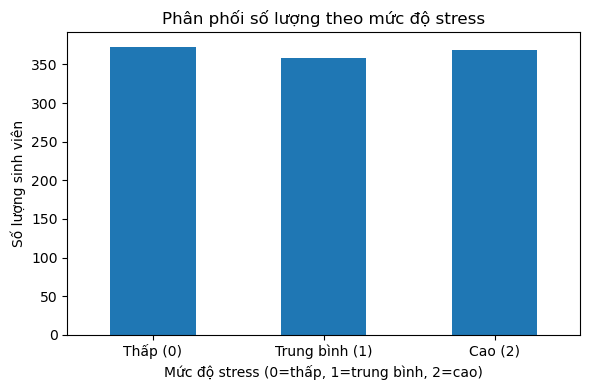

In [126]:
# Q1 – Analysis: Plot phân phối stress_level (số lượng)

fig, ax = plt.subplots()
stress_counts.plot(kind="bar", ax=ax)

ax.set_title("Phân phối số lượng theo mức độ stress")
ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
ax.set_ylabel("Số lượng sinh viên")
ax.set_xticklabels(["Thấp (0)", "Trung bình (1)", "Cao (2)"], rotation=0)

plt.tight_layout()
plt.show()


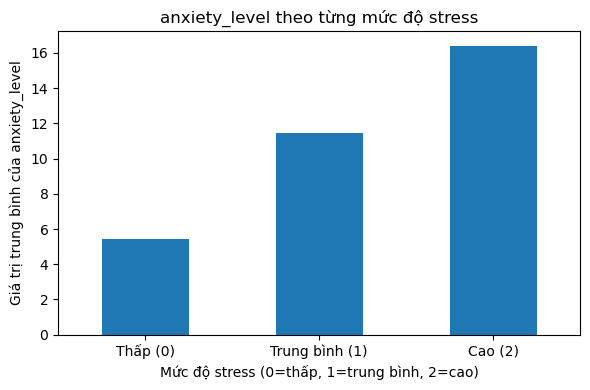

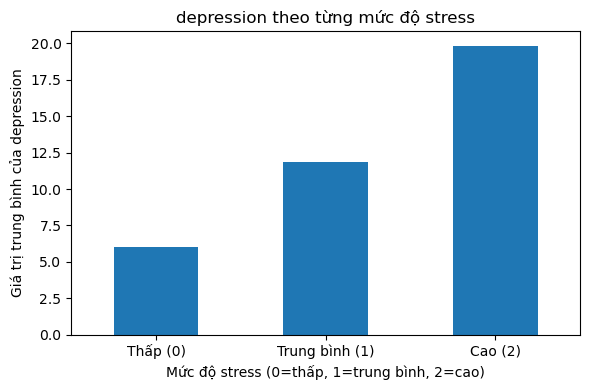

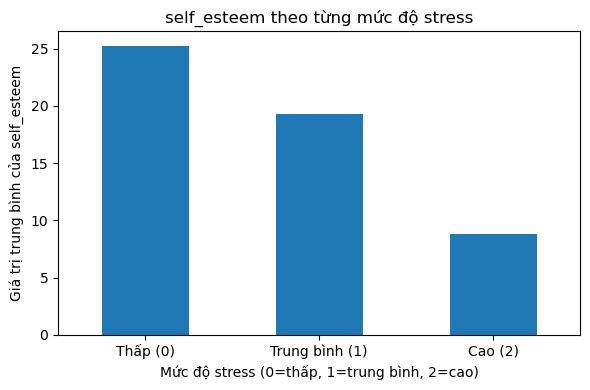

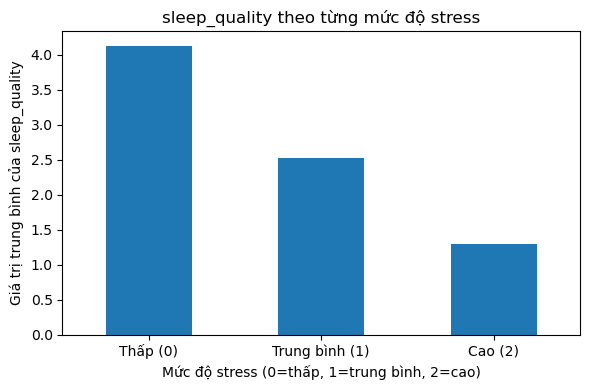

In [127]:
# Q1 – Analysis: So sánh một số biến key giữa 3 mức stress

variables_to_plot = [
    "anxiety_level",
    "depression",
    "self_esteem",
    "sleep_quality",
]

for col in variables_to_plot:
    fig, ax = plt.subplots()
    profile_focus[col].plot(kind="bar", ax=ax)

    ax.set_title(f"{col} theo từng mức độ stress")
    ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
    ax.set_ylabel(f"Giá trị trung bình của {col}")
    ax.set_xticklabels(["Thấp (0)", "Trung bình (1)", "Cao (2)"], rotation=0)

    plt.tight_layout()
    plt.show()


### Q1 – C. Kết quả & Diễn giải

#### 1. Kết quả chính (số liệu)

**Phân phối các mức độ stress:**

- `stress_level = 0` (thấp): **373** sinh viên (~**33.9%**)  
- `stress_level = 1` (trung bình): **358** sinh viên (~**32.5%**)  
- `stress_level = 2` (cao): **369** sinh viên (~**33.5%**)  

→ Ba nhóm có kích thước gần như tương đương, không có lớp nào chiếm ưu thế tuyệt đối.

**Chân dung trung bình của từng nhóm (một số biến tiêu biểu):**

(Trích từ bảng `profile_focus`)

- **Nhóm stress thấp (0):**
  - `anxiety_level` ≈ **5.43**
  - `depression` ≈ **6.01**
  - `self_esteem` ≈ **25.25**
  - `sleep_quality` ≈ **4.13**
  - `academic_performance` ≈ **4.14**
  - `bullying` ≈ **1.25**
  - `peer_pressure` ≈ **1.68**
  - `social_support` ≈ **2.54**
  - `safety` ≈ **4.10**
  - `basic_needs` ≈ **4.14**

- **Nhóm stress trung bình (1):**
  - `anxiety_level` ≈ **11.43**
  - `depression` ≈ **11.87**
  - `self_esteem` ≈ **19.26**
  - `sleep_quality` ≈ **2.53**
  - `academic_performance` ≈ **2.49**
  - `bullying` ≈ **2.56**
  - `peer_pressure` ≈ **2.46**
  - `social_support` ≈ **2.18**
  - `safety` ≈ **2.42**
  - `basic_needs` ≈ **2.48**

- **Nhóm stress cao (2):**
  - `anxiety_level` ≈ **16.40**
  - `depression` ≈ **19.83**
  - `self_esteem` ≈ **8.78**
  - `sleep_quality` ≈ **1.30**
  - `academic_performance` ≈ **1.66**
  - `bullying` ≈ **4.05**
  - `peer_pressure` ≈ **4.07**
  - `social_support` ≈ **0.93**
  - `safety` ≈ **1.67**
  - `basic_needs` ≈ **1.67**

#### 2. Diễn giải & Ý nghĩa

**(a) Phân bố stress:**

- Mức stress thấp, trung bình, cao đều chiếm khoảng **1/3** mẫu.
- Điều này thuận lợi cho các phân tích sau (đặc biệt là mô hình phân loại),
  vì không có lớp nào bị thiếu nghiêm trọng (không bị class imbalance).

**(b) So sánh chân dung nhóm stress thấp vs cao:**

- Khi đi từ nhóm stress thấp → trung bình → cao:
  - `anxiety_level` và `depression` **tăng mạnh** (từ ~5.4 lên ~16.4
    đối với anxiety; từ ~6.0 lên ~19.8 đối với depression).
  - `self_esteem` **giảm rất mạnh** (từ ~25.3 xuống ~8.8).
  - `sleep_quality` **giảm rõ rệt** (từ ~4.1 xuống ~1.3).
  - `academic_performance` giảm (từ ~4.14 xuống ~1.66).
  - `bullying` và `peer_pressure` **tăng đáng kể** (bullying: ~1.25 → ~4.05;
    peer_pressure: ~1.68 → ~4.07).
  - `social_support`, `safety`, `basic_needs` đều **giảm mạnh**
    (ví dụ `social_support` từ ~2.54 xuống ~0.93).

→ Nhóm **stress cao** mang chân dung “bất lợi” trên hầu hết các mặt:
- Tâm lý: lo âu, trầm cảm cao, tự trọng thấp.  
- Thể chất: giấc ngủ kém.  
- Học tập: kết quả học tập thấp hơn.  
- Xã hội/môi trường: bị bắt nạt nhiều, áp lực bạn bè cao, ít hỗ trợ xã hội,
  ít cảm giác an toàn, nhu cầu cơ bản ít được đáp ứng.

Ngược lại, nhóm **stress thấp** có:
- Lo âu/trầm cảm thấp, tự trọng cao.  
- Ngủ tốt, điểm học tập tốt.  
- Ít bị bắt nạt, ít áp lực bạn bè.  
- Nhận được hỗ trợ xã hội tốt hơn, cảm thấy an toàn và nhu cầu cơ bản
  được đáp ứng tương đối đầy đủ.

#### 3. Câu trả lời rõ ràng cho Câu 1

- **Phân bố:** stress được phân chia gần như đều giữa 3 mức (thấp, trung bình, cao).  
- **Chân dung:** giữa 3 nhóm có **khác biệt rất rõ** về hầu hết các biến tâm lý, thể chất,
  học tập và xã hội; trong đó nhóm stress cao hội tụ nhiều yếu tố bất lợi.

#### 4. Bất ngờ & Hạn chế

- **Điểm bất ngờ:**  
  - Mức chênh lệch `self_esteem`, `sleep_quality`, `bullying` giữa stress thấp và cao
    khá lớn, cho thấy các yếu tố này có thể đóng vai trò rất quan trọng.
- **Hạn chế:**  
  - Mới chỉ là phân tích mô tả, chưa dùng kiểm định thống kê (ANOVA, t-test) để
    xác nhận khác biệt có ý nghĩa thống kê hay không.
  - Chỉ dựa trên trung bình, chưa xem xét phân phối chi tiết (variance) trong từng nhóm.
  - Không thể kết luận nhân quả: không thể nói “bullying gây ra stress”,
    chỉ có thể nói “stress cao thường đi kèm điểm bullying cao”.


## Q2 - Các yếu tố tâm lý cốt lõi như anxiety_level, depression, self_esteem và mental_health_history có liên quan như thế nào đến stress_level?

### Q2 – A. Tiền xử lý (Preprocessing)

Mục tiêu: Chuẩn bị các cấu trúc dữ liệu cần thiết để phân tích mối quan hệ giữa
các **yếu tố tâm lý** và **mức độ stress**.

Các bước thực hiện:

1. **Chọn tập biến liên quan đến tâm lý:**
   - Biến mục tiêu: `stress_level`.
   - Các biến tâm lý chính:
     - `anxiety_level`  – mức độ lo âu
     - `depression`     – mức độ trầm cảm
     - `self_esteem`    – mức độ tự trọng
     - `mental_health_history` – có/không tiền sử vấn đề sức khỏe tâm thần
   - Lý do: Đây là các biến tâm lý cốt lõi trong lý thuyết về stress.

2. **Tạo bảng tóm tắt theo từng mức stress:**
   - Gom nhóm theo `stress_level` và tính:
     - Giá trị trung bình của `anxiety_level`, `depression`, `self_esteem`,
       `sleep_quality`, `mental_health_history`.
   - Lý do: So sánh “chân dung tâm lý” của 3 nhóm stress (thấp, trung bình, cao).

3. **Chuẩn bị các cấu trúc cho phân tích tương quan:**
   - Tính hệ số tương quan Pearson giữa `stress_level` và các biến tâm lý nói trên.
   - Lý do: Định lượng mức độ liên hệ tuyến tính (mạnh/yếu, dương/âm).

4. **Chuẩn bị bảng chéo (crosstab) cho `mental_health_history`:**
   - Tạo bảng tần suất giữa `stress_level` và `mental_health_history`.
   - Lý do: Đây là biến nhị phân (0/1), phân tích bằng tương quan số chưa đủ tương quan; bảng chéo giúp nhìn rõ phân bố các nhóm.

Vì tập dữ liệu:
- Không có giá trị thiếu (0% missing),
- Không có dòng trùng lặp,
nên **không cần xử lý làm sạch bổ sung** trong câu hỏi này.


In [128]:
# Q2 – Preprocessing

# 1. Chọn các biến tâm lý chính + biến mục tiêu
psych_columns = [
    "anxiety_level",
    "depression",
    "self_esteem",
    "mental_health_history",
    "sleep_quality",       # thêm sleep_quality để bổ sung bối cảnh
    "stress_level",
]

df_psych = df[psych_columns].copy()

# 2. Bảng trung bình theo từng mức stress
psych_profile_by_stress = (
    df_psych
    .groupby("stress_level")
    .mean(numeric_only=True)
    .round(2)
)

print("Chân dung tâm lý trung bình theo từng mức stress:")
display(psych_profile_by_stress)

# 3. Tính tương quan giữa các biến tâm lý và stress_level
corr_with_stress_psych = (
    df_psych
    .corr(numeric_only=True)["stress_level"]
    .sort_values(ascending=False)
)

print("\nTương quan giữa các biến tâm lý và stress_level:")
display(corr_with_stress_psych)

# 4. Bảng chéo: stress_level × mental_health_history
mh_crosstab = pd.crosstab(
    df_psych["stress_level"],
    df_psych["mental_health_history"]
)

print("\nBảng chéo stress_level × mental_health_history:")
display(mh_crosstab)


Chân dung tâm lý trung bình theo từng mức stress:


,anxiety_level,depression,self_esteem,mental_health_history,sleep_quality
stress_level,,,,,
0,5.43,6.01,25.25,0.10,4.13
1,11.43,11.87,19.26,0.49,2.53
2,16.40,19.83,8.78,0.89,1.30



Tương quan giữa các biến tâm lý và stress_level:


stress_level             1.000000
anxiety_level            0.736795
depression               0.734379
mental_health_history    0.648644
sleep_quality           -0.749068
self_esteem             -0.756195
Name: stress_level, dtype: float64


Bảng chéo stress_level × mental_health_history:


mental_health_history,0,1
stress_level,,
0,335,38
1,183,175
2,40,329


### Q2 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. Mô tả cách mà các biến tâm lý (`anxiety_level`, `depression`, `self_esteem`,
   `sleep_quality`, `mental_health_history`) thay đổi theo từng mức `stress_level`.
2. Đo lường mức độ **tương quan tuyến tính** giữa từng biến tâm lý và `stress_level`.
3. Phát hiện các pattern điển hình:
   - Stress cao có luôn đi kèm lo âu/trầm cảm cao, tự trọng thấp, ngủ kém không?
   - Nhóm có tiền sử sức khỏe tâm thần có xu hướng rơi vào stress cao nhiều hơn không?

**Phương pháp:**

1. **Mô tả theo nhóm (grouped descriptive statistics):**
   - Sử dụng bảng trung bình (`groupby("stress_level").mean()`) để xem:
     - Các mean của `anxiety_level`, `depression`, `self_esteem`,
       `sleep_quality`, `mental_health_history`.
   - Trực quan hóa bằng **biểu đồ cột**:
     - Mỗi biến tâm lý được vẽ 1 bar chart với 3 cột (stress 0, 1, 2).

2. **Tương quan Pearson:**
   - Tính hệ số tương quan Pearson giữa `stress_level` và từng biến tâm lý.
   - Diễn giải:
     - Giá trị dương lớn → biến tăng khi stress tăng (risk factor).
     - Giá trị âm lớn về độ lớn → biến giảm khi stress tăng (protective factor).

3. **Phân tích bảng chéo cho `mental_health_history`:**
   - Dùng `pd.crosstab(stress_level, mental_health_history)`.
   - Tính tỉ lệ phần trăm trong từng mức stress để xem:
     - Trong nhóm stress cao, tỉ lệ có tiền sử vấn đề MH là bao nhiêu?
     - So sánh với nhóm stress thấp.

**Kỳ vọng đầu ra:**

- 2+ biểu đồ:
  - Biểu đồ cột so sánh `anxiety_level`, `depression`, `self_esteem`,
    `sleep_quality` giữa 3 nhóm stress.
  - Biểu đồ cột thể hiện phân bố `mental_health_history` theo `stress_level`.
- Bảng số:
  - Bảng mean tâm lý theo nhóm stress.
  - Hệ số tương quan Pearson với `stress_level`.
  - Bảng chéo stress_level × mental_health_history.
- Diễn giải rõ ràng:
  - Xác định yếu tố tâm lý nào liên hệ mạnh nhất với stress.


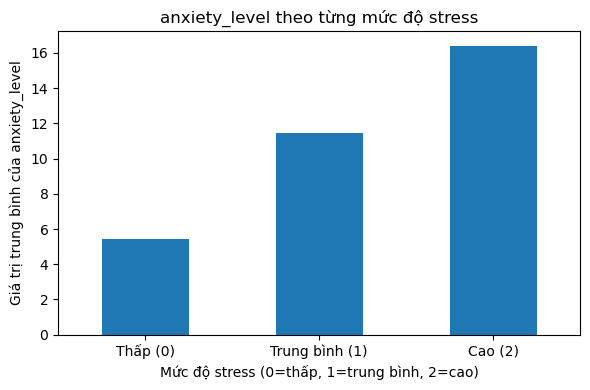

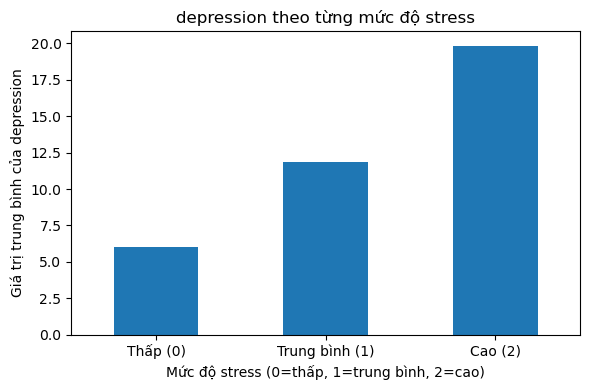

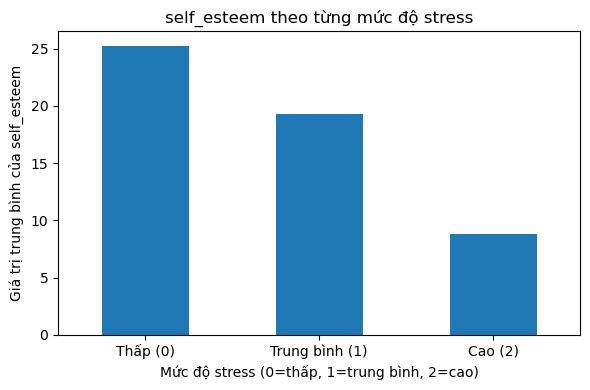

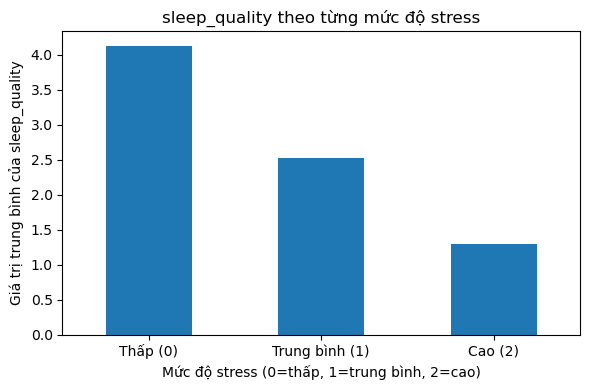

In [129]:
# Q2 – Analysis: Bar chart cho các biến tâm lý chính theo mức stress

vars_to_plot = [
    "anxiety_level",
    "depression",
    "self_esteem",
    "sleep_quality",
]

for col in vars_to_plot:
    fig, ax = plt.subplots()
    psych_profile_by_stress[col].plot(kind="bar", ax=ax)

    ax.set_title(f"{col} theo từng mức độ stress")
    ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
    ax.set_ylabel(f"Giá trị trung bình của {col}")
    ax.set_xticklabels(["Thấp (0)", "Trung bình (1)", "Cao (2)"], rotation=0)

    plt.tight_layout()
    plt.show()


Tỉ lệ mental_health_history trong từng mức stress (dòng chuẩn hóa):


mental_health_history,0,1
stress_level,,
0,0.898,0.102
1,0.511,0.489
2,0.108,0.892


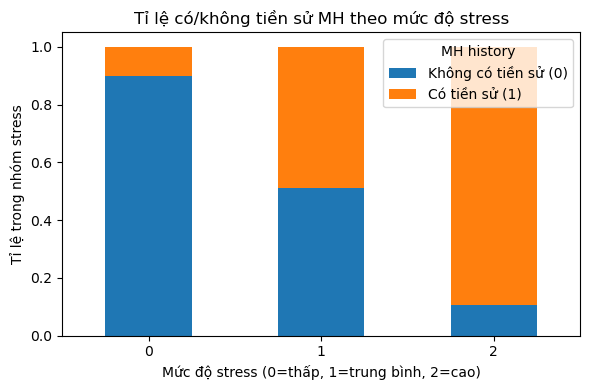

In [130]:
# Q2 – Analysis: Biểu đồ cột cho mental_health_history theo stress_level

# Tính tỉ lệ phần trăm trong từng mức stress
mh_percent = (
    mh_crosstab
    .div(mh_crosstab.sum(axis=1), axis=0)
    .round(3)
)

print("Tỉ lệ mental_health_history trong từng mức stress (dòng chuẩn hóa):")
display(mh_percent)

fig, ax = plt.subplots()
mh_percent.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Tỉ lệ có/không tiền sử MH theo mức độ stress")
ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
ax.set_ylabel("Tỉ lệ trong nhóm stress")
ax.legend(["Không có tiền sử (0)", "Có tiền sử (1)"], title="MH history")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


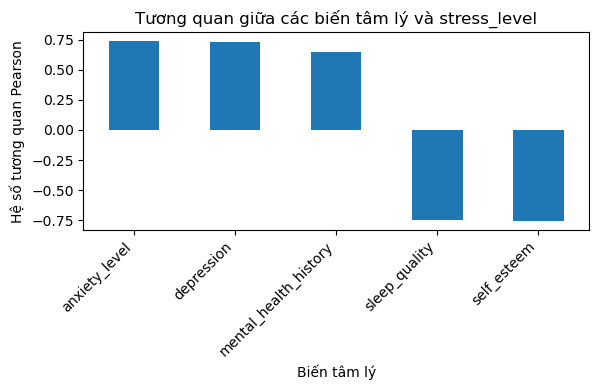

In [131]:
# Q2 – Analysis: Biểu đồ thanh thể hiện hệ số tương quan với stress_level

# Lọc chỉ các biến tâm lý (không vẽ chính stress_level)
corr_psych_only = corr_with_stress_psych.drop("stress_level")

fig, ax = plt.subplots()
corr_psych_only.plot(kind="bar", ax=ax)

ax.set_title("Tương quan giữa các biến tâm lý và stress_level")
ax.set_xlabel("Biến tâm lý")
ax.set_ylabel("Hệ số tương quan Pearson")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


### Q2 – C. Kết quả & Diễn giải

#### 1. Kết quả định lượng chính

**(a) Chân dung tâm lý theo mức độ stress (mean):**

Từ bảng `psych_profile_by_stress`:

- **Nhóm stress thấp (0):**
  - `anxiety_level` ≈ **5.43**
  - `depression` ≈ **6.01**
  - `self_esteem` ≈ **25.25**
  - `sleep_quality` ≈ **4.13**
  - `mental_health_history` ≈ **0.10** (≈ 10% có tiền sử MH)

- **Nhóm stress trung bình (1):**
  - `anxiety_level` ≈ **11.43**
  - `depression` ≈ **11.87**
  - `self_esteem` ≈ **19.26**
  - `sleep_quality` ≈ **2.53**
  - `mental_health_history` ≈ **0.49** (≈ 49% có tiền sử MH)

- **Nhóm stress cao (2):**
  - `anxiety_level` ≈ **16.40**
  - `depression` ≈ **19.83**
  - `self_esteem` ≈ **8.78**
  - `sleep_quality` ≈ **1.30**
  - `mental_health_history` ≈ **0.89** (≈ 89% có tiền sử MH)

**(b) Hệ số tương quan với stress_level:**

Từ `corr_with_stress_psych`:

- `anxiety_level`  ≈ **0.74**  (tương quan dương mạnh)  
- `depression`     ≈ **0.73**  (tương quan dương mạnh)  
- `mental_health_history` ≈ **0.65** (dương khá mạnh)  
- `sleep_quality`  ≈ **-0.75** (âm rất mạnh)  
- `self_esteem`    ≈ **-0.76** (âm rất mạnh)

→ Lo âu, trầm cảm, tiền sử MH **tăng** khi stress tăng;  
→ Tự trọng và chất lượng giấc ngủ **giảm** khi stress tăng.

**(c) Bảng chéo mental_health_history × stress_level:**

Từ `mh_crosstab` (số lượng):

- Stress thấp (0): 335 không có tiền sử, 38 có tiền sử  
- Stress trung bình (1): 183 không, 175 có  
- Stress cao (2): 40 không, 329 có  

Chuẩn hóa theo hàng (mh_percent):

- Nhóm stress thấp: ~90% **không** có tiền sử MH.  
- Nhóm stress cao: ~89% **có** tiền sử MH.

#### 2. Diễn giải

**(a) Mối quan hệ với lo âu và trầm cảm:**

- Khi đi từ stress thấp → trung bình → cao:
  - `anxiety_level`: ~5.4 → ~11.4 → ~16.4  
  - `depression`:   ~6.0 → ~11.9 → ~19.8  
- Hệ số tương quan ≈ 0.74 cho cả hai biến, cho thấy:
  - Sinh viên có mức lo âu và trầm cảm cao **rất dễ** rơi vào nhóm stress cao.
  - Đây là **yếu tố nguy cơ tâm lý** rất mạnh.

**(b) Mối quan hệ với tự trọng (`self_esteem`):**

- Mean giảm từ ~25.25 (stress thấp) xuống ~8.78 (stress cao).  
- Tương quan ≈ -0.76 (âm mạnh nhất trong các biến tâm lý):
  - Tự trọng càng thấp thì stress càng cao.
- Gợi ý: các can thiệp nâng cao self-esteem có thể có tác dụng giảm stress.

**(c) Chất lượng giấc ngủ (`sleep_quality`):**

- Mean: ~4.13 (stress thấp) → ~2.53 (trung bình) → ~1.30 (cao).  
- Tương quan ≈ -0.75:
  - Ngủ càng kém thì stress càng cao.
- Kết quả này phù hợp với nhiều nghiên cứu về mối liên hệ giữa giấc ngủ,
  sức khỏe tinh thần và stress.

**(d) Tiền sử sức khỏe tâm thần (`mental_health_history`):**

- Trong nhóm stress thấp, chỉ khoảng 10% có tiền sử MH.  
- Trong nhóm stress cao, khoảng 89% có tiền sử MH.
- Tương quan ≈ 0.65:
  - Sinh viên có tiền sử vấn đề sức khỏe tâm thần có nguy cơ stress cao hơn rất nhiều.

#### 3. Trả lời câu hỏi Q2

- Các yếu tố tâm lý **liên quan mạnh nhất** tới `stress_level` là:
  - **Lo âu (`anxiety_level`)** và **trầm cảm (`depression`)** – tương quan dương mạnh.  
  - **Tự trọng (`self_esteem`)** và **chất lượng giấc ngủ (`sleep_quality`)** – tương quan âm mạnh.  
  - **Tiền sử MH (`mental_health_history`)** – liên quan dương khá mạnh và thể hiện rõ
    qua bảng chéo (tỉ lệ rất cao ở nhóm stress cao).
- Điều này cho thấy:
  - Stress cao không đơn thuần là “căng thẳng vì học”, mà gắn với **nền tảng
    sức khỏe tâm thần** (lo âu, trầm cảm, tiền sử MH), **cảm nhận về bản thân**
    (self-esteem) và **giấc ngủ**.

#### 4. Bất ngờ & Hạn chế

- **Bất ngờ tích cực:**
  - Hệ số tương quan rất cao về độ lớn (≈ 0.7–0.75) cho một tập dữ liệu khảo sát là
    khá hiếm, cho thấy bộ dữ liệu nhất quán với các pattern tâm lý học cổ điển.
- **Hạn chế:**
  - Tương quan không chứng minh được quan hệ nhân quả.
  - Phân tích chưa sử dụng mô hình hồi quy hoặc mô hình cấu trúc để kiểm soát
    các biến nhiễu khác.
  - Không có biến nhân khẩu học (giới tính, tuổi,…) để kiểm tra tác động khác biệt
    giữa các nhóm dân số.


## Q3 - Chất lượng giấc ngủ (`sleep_quality`) có mối liên hệ như thế nào với các triệu chứng thể chất (`headache`, `blood_pressure`, `breathing_problem`) và mức độ stress (`stress_level`)?

### Q3 – A. Tiền xử lý (Preprocessing)

**Mục tiêu tiền xử lý cho Q3:**

- Tạo các **nhóm chất lượng giấc ngủ** (sleep groups) để so sánh:
  - Nhóm ngủ kém, ngủ trung bình, ngủ tốt.
- Chuẩn bị các bảng tóm tắt để:
  - So sánh các triệu chứng thể chất giữa các nhóm ngủ.
  - Kiểm tra phân bố `stress_level` trong từng nhóm ngủ.

---

#### 1. Chọn các biến liên quan

Ta tập trung vào các biến:

- `sleep_quality`          – chất lượng giấc ngủ (thang 0–5)
- `headache`               – mức độ đau đầu
- `blood_pressure`         – vấn đề huyết áp
- `breathing_problem`      – vấn đề hô hấp
- `stress_level`           – mức độ stress tổng thể

Tạo một DataFrame con chứa các biến này để dễ thao tác.

---

#### 2. Tạo nhóm chất lượng giấc ngủ (sleep_group)

`sleep_quality` là thang điểm từ 0 đến 5.  
Để dễ phân tích, ta chia thành 3 nhóm:

- **Thấp (0–1):** ngủ rất kém hoặc kém  
- **Trung bình (2–3):** ngủ ở mức chấp nhận được  
- **Cao (4–5):** ngủ tốt hoặc rất tốt  

Cách làm:

- Dùng `pd.cut()` với các khoảng:
  - \[-0.1, 1.5)  → "Thấp (0-1)"
  - \[1.5, 3.5)   → "Trung bình (2-3)"
  - \[3.5, 5.1]   → "Cao (4-5)"

Lý do:

- Chia theo ý nghĩa trực quan của thang đo (0–1 kém, 2–3 trung bình, 4–5 tốt).
- 3 nhóm này có số lượng quan sát tương đối cân đối → so sánh công bằng hơn.

---

#### 3. Tạo các bảng tóm tắt ban đầu

Sau khi có `sleep_group`, ta:

1. **Đếm số lượng mỗi nhóm ngủ:**  
   - Kiểm tra xem có đủ dữ liệu ở từng nhóm hay không.

2. **Tính trung bình triệu chứng thể chất và stress theo nhóm ngủ:**  
   - `headache`, `blood_pressure`, `breathing_problem`, `stress_level`
   - Mục tiêu: xem nhóm ngủ kém có triệu chứng thể chất và stress cao hơn không.

3. **Chuẩn bị bảng chéo (crosstab) sleep_group × stress_level:**  
   - Để xem trong mỗi nhóm ngủ, tỷ lệ stress thấp/trung bình/cao phân bố ra sao.

Do dataset **không có missing/duplicate**, nên **không cần bước làm sạch dữ liệu bổ sung**.


In [132]:
# Q3 – Preprocessing

# 1. Chọn các biến liên quan đến giấc ngủ, thể chất và stress
sleep_phys_cols = [
    "sleep_quality",
    "headache",
    "blood_pressure",
    "breathing_problem",
    "stress_level",
]
df_sleep = df[sleep_phys_cols].copy()

# 2. Tạo nhóm chất lượng giấc ngủ (sleep_group)
sleep_bins = [-0.1, 1.5, 3.5, 5.1]
sleep_labels = ["Thấp (0-1)", "Trung bình (2-3)", "Cao (4-5)"]

df_sleep["sleep_group"] = pd.cut(
    df_sleep["sleep_quality"],
    bins=sleep_bins,
    labels=sleep_labels
)

# 3. Kiểm tra phân phối nhóm giấc ngủ
sleep_group_counts = df_sleep["sleep_group"].value_counts().sort_index()
print("Số lượng theo từng nhóm chất lượng giấc ngủ:")
display(sleep_group_counts)

# 4. Tính trung bình triệu chứng thể chất và stress theo nhóm ngủ
group_means_sleep = (
    df_sleep
    .groupby("sleep_group", observed=True)[
        ["headache", "blood_pressure", "breathing_problem", "stress_level"]
    ]
    .mean()
    .round(2)
)

print("\nTrung bình triệu chứng thể chất và stress theo nhóm giấc ngủ:")
display(group_means_sleep)

# 5. Bảng chéo sleep_group × stress_level
crosstab_sleep_stress = pd.crosstab(
    df_sleep["sleep_group"],
    df_sleep["stress_level"]
)

print("\nBảng chéo sleep_group × stress_level (số lượng):")
display(crosstab_sleep_stress)


Số lượng theo từng nhóm chất lượng giấc ngủ:


sleep_group
Thấp (0-1)          362
Trung bình (2-3)    358
Cao (4-5)           380
Name: count, dtype: int64


Trung bình triệu chứng thể chất và stress theo nhóm giấc ngủ:


,headache,blood_pressure,breathing_problem,stress_level
sleep_group,,,,
Thấp (0-1),3.73,3.00,3.69,1.84
Trung bình (2-3),2.51,1.32,2.93,0.97
Cao (4-5),1.34,2.21,1.70,0.21



Bảng chéo sleep_group × stress_level (số lượng):


stress_level,0,1,2
sleep_group,,,
Thấp (0-1),21,15,326
Trung bình (2-3),27,314,17
Cao (4-5),325,29,26


### Q3 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. Kiểm tra **phân phối `sleep_quality`** và các nhóm `sleep_group`.  
2. So sánh **trung bình các triệu chứng thể chất** giữa các nhóm ngủ:  
   - `headache`, `blood_pressure`, `breathing_problem`.  
3. Đánh giá mối liên hệ giữa **giấc ngủ và stress**:
   - `sleep_group` vs. `stress_level`.
   - Tương quan giữa `sleep_quality` và `stress_level`.

---

#### 1. Phương pháp chính

1. **Mô tả phân phối giấc ngủ:**
   - Vẽ **histogram** cho `sleep_quality` để xem phổ điểm.
   - Vẽ **bar chart** cho số lượng từng `sleep_group`.

2. **So sánh triệu chứng thể chất theo nhóm ngủ:**
   - Dùng bảng mean `group_means_sleep` để xem:
     - Nhóm ngủ kém có trung bình `headache`, `blood_pressure`,
       `breathing_problem` cao hơn không.
   - Vẽ **bar chart** cho từng biến thể chất:
     - Trục x: `sleep_group`
     - Trục y: giá trị trung bình

3. **Phân tích mối liên hệ giấc ngủ – stress:**
   - Vẽ **stacked bar chart** từ bảng chéo `sleep_group × stress_level`
     (chuẩn hóa theo hàng) để xem tỉ lệ stress thấp/trung bình/cao trong mỗi nhóm ngủ.
   - Tính **tương quan Pearson** giữa `sleep_quality` và các biến:
     - `headache`, `blood_pressure`, `breathing_problem`, `stress_level`.

---

#### 2. Kỳ vọng đầu ra

- Ít nhất **3 biểu đồ**:
  - Histogram `sleep_quality`.
  - Bar chart mean `headache` (và các triệu chứng khác) theo `sleep_group`.
  - Stacked bar chart phân bố `stress_level` trong từng `sleep_group`.
- Bảng số:
  - `group_means_sleep`: trung bình triệu chứng thể chất và stress.
  - Ma trận tương quan con cho các biến:  
    `sleep_quality`, `headache`, `blood_pressure`, `breathing_problem`, `stress_level`.
- Diễn giải:
  - Có hay không xu hướng “ngủ càng kém → bệnh thể chất nhiều → stress cao”.


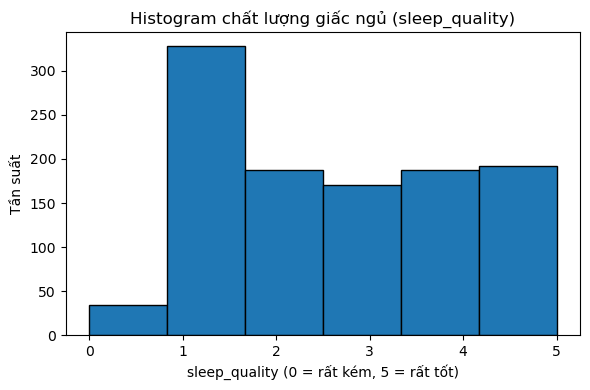

In [133]:
# Q3 – Analysis: Histogram của sleep_quality

fig, ax = plt.subplots()
ax.hist(df_sleep["sleep_quality"], bins=6, edgecolor="black")

ax.set_title("Histogram chất lượng giấc ngủ (sleep_quality)")
ax.set_xlabel("sleep_quality (0 = rất kém, 5 = rất tốt)")
ax.set_ylabel("Tần suất")

plt.tight_layout()
plt.show()


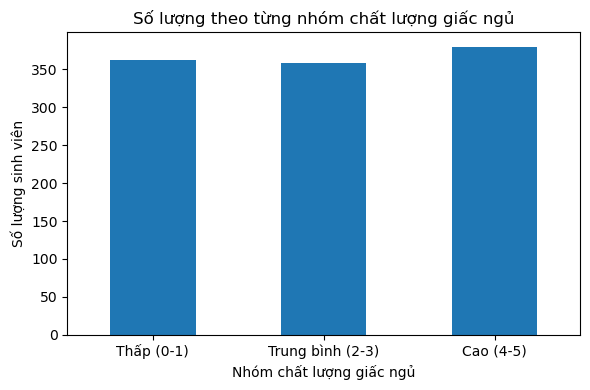

In [134]:
# Q3 – Analysis: Bar chart số lượng từng nhóm sleep_group

fig, ax = plt.subplots()
sleep_group_counts.plot(kind="bar", ax=ax)

ax.set_title("Số lượng theo từng nhóm chất lượng giấc ngủ")
ax.set_xlabel("Nhóm chất lượng giấc ngủ")
ax.set_ylabel("Số lượng sinh viên")
ax.set_xticklabels(sleep_group_counts.index, rotation=0)

plt.tight_layout()
plt.show()


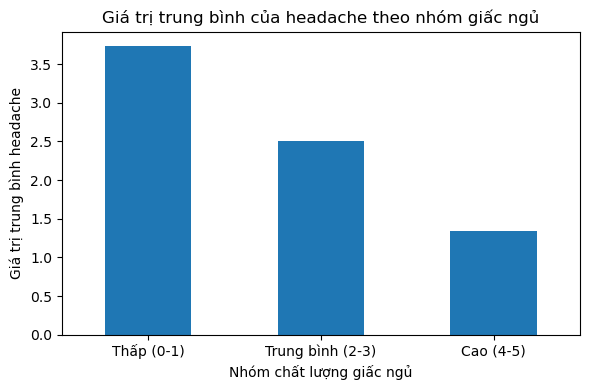

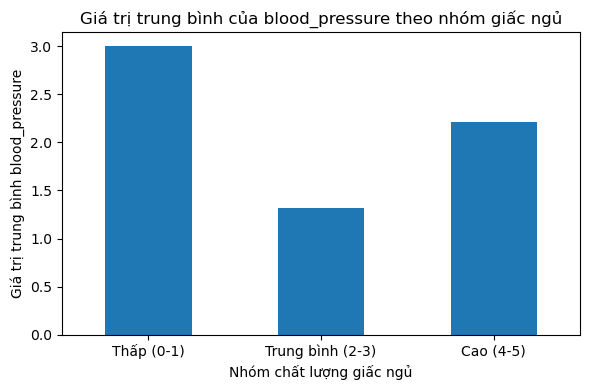

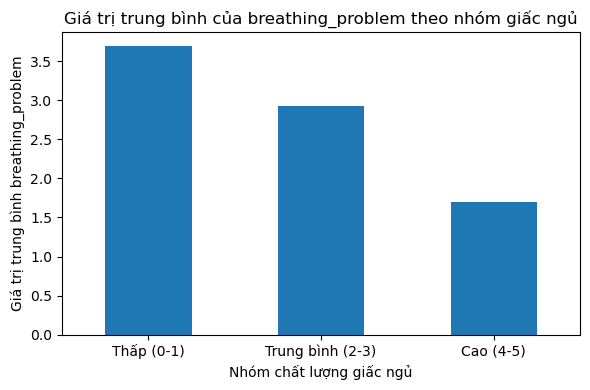

In [135]:
# Q3 – Analysis: So sánh mean triệu chứng thể chất theo sleep_group

phys_vars = ["headache", "blood_pressure", "breathing_problem"]

for col in phys_vars:
    fig, ax = plt.subplots()
    group_means_sleep[col].plot(kind="bar", ax=ax)

    ax.set_title(f"Giá trị trung bình của {col} theo nhóm giấc ngủ")
    ax.set_xlabel("Nhóm chất lượng giấc ngủ")
    ax.set_ylabel(f"Giá trị trung bình {col}")
    ax.set_xticklabels(group_means_sleep.index, rotation=0)

    plt.tight_layout()
    plt.show()


Tỉ lệ stress_level trong mỗi nhóm sleep_group (chuẩn hóa theo hàng):


stress_level,0,1,2
sleep_group,,,
Thấp (0-1),0.058,0.041,0.901
Trung bình (2-3),0.075,0.877,0.047
Cao (4-5),0.855,0.076,0.068


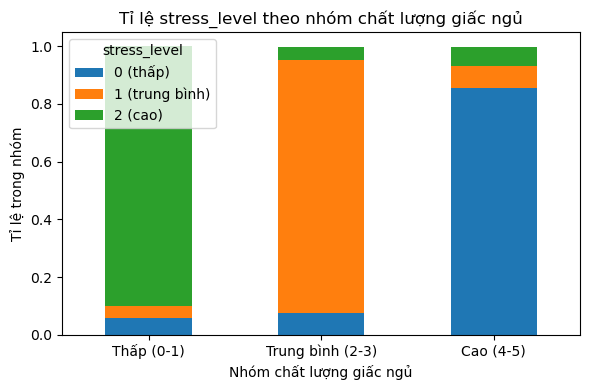

In [136]:
# Q3 – Analysis: Phân bố stress_level trong từng nhóm sleep_group (tỉ lệ)

sleep_stress_percent = (
    crosstab_sleep_stress
    .div(crosstab_sleep_stress.sum(axis=1), axis=0)
    .round(3)
)

print("Tỉ lệ stress_level trong mỗi nhóm sleep_group (chuẩn hóa theo hàng):")
display(sleep_stress_percent)

fig, ax = plt.subplots()
sleep_stress_percent.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Tỉ lệ stress_level theo nhóm chất lượng giấc ngủ")
ax.set_xlabel("Nhóm chất lượng giấc ngủ")
ax.set_ylabel("Tỉ lệ trong nhóm")
ax.legend(
    title="stress_level",
    labels=["0 (thấp)", "1 (trung bình)", "2 (cao)"]
)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [137]:
# Q3 – Analysis: Ma trận tương quan liên quan tới giấc ngủ

corr_sleep_phys = df_sleep[
    ["sleep_quality", "headache",
     "blood_pressure", "breathing_problem",
     "stress_level"]
].corr()

print("Ma trận tương quan giữa giấc ngủ, triệu chứng thể chất và stress:")
display(corr_sleep_phys)


Ma trận tương quan giữa giấc ngủ, triệu chứng thể chất và stress:


,sleep_quality,headache,blood_pressure,breathing_problem,stress_level
sleep_quality,1.000000,-0.638771,-0.300323,-0.541687,-0.749068
headache,-0.638771,1.000000,0.361986,0.461719,0.713484
blood_pressure,-0.300323,0.361986,1.000000,0.162308,0.394200
breathing_problem,-0.541687,0.461719,0.162308,1.000000,0.573984
stress_level,-0.749068,0.713484,0.394200,0.573984,1.000000


### Q3 – C. Kết quả & Diễn giải

#### 1. Kết quả định lượng chính

**(a) Phân phối nhóm giấc ngủ:**

Từ `sleep_group_counts`:

- `Thấp (0-1)`     : **362** sinh viên  
- `Trung bình (2-3)`: **358** sinh viên  
- `Cao (4-5)`       : **380** sinh viên  

→ Ba nhóm khá cân bằng về số lượng, phù hợp để so sánh.

---

**(b) Triệu chứng thể chất & stress theo nhóm giấc ngủ**

Từ `group_means_sleep`:

| Nhóm giấc ngủ      | headache | blood_pressure | breathing_problem | stress_level |
|--------------------|----------|----------------|-------------------|-------------|
| Thấp (0-1)         | 3.73     | 3.00           | 3.69              | 1.84        |
| Trung bình (2-3)   | 2.51     | 1.32           | 2.93              | 0.97        |
| Cao (4-5)          | 1.34     | 2.21           | 1.70              | 0.21        |

Nhận xét:

- **Đau đầu (`headache`)**:
  - Cao nhất ở nhóm **ngủ kém** (3.73), giảm dần ở nhóm trung bình (2.51),
    thấp nhất ở nhóm **ngủ tốt** (1.34).

- **Vấn đề hô hấp (`breathing_problem`)**:
  - Nhóm ngủ kém: 3.69  
  - Trung bình: 2.93  
  - Ngủ tốt: 1.70  
  → Ngủ kém đi kèm với nhiều vấn đề hô hấp hơn.

- **Huyết áp (`blood_pressure`)**:
  - Nhóm ngủ kém: 3.00 (cao nhất)  
  - Trung bình: 1.32 (thấp nhất)  
  - Ngủ tốt: 2.21 (ở giữa)  
  → Mối quan hệ phức tạp hơn, nhưng nhìn chung nhóm ngủ kém vẫn có mức trung bình cao.

- **Mức độ stress (`stress_level`)**:
  - Nhóm ngủ kém: 1.84 (gần với stress cao ~2)  
  - Trung bình: 0.97  
  - Ngủ tốt: 0.21 (rất gần với stress thấp ~0)

---

**(c) Phân bố stress_level trong từng nhóm sleep_group**

Từ `sleep_stress_percent`:

- **Nhóm ngủ kém (Thấp 0-1):**
  - Stress thấp (0): ~**5.8%**
  - Stress trung bình (1): ~**4.1%**
  - Stress cao (2): ~**90.1%**

- **Nhóm ngủ trung bình (2-3):**
  - Stress thấp (0): ~**7.5%**
  - Stress trung bình (1): ~**87.7%**
  - Stress cao (2): ~**4.7%**

- **Nhóm ngủ tốt (Cao 4-5):**
  - Stress thấp (0): ~**85.5%**
  - Stress trung bình (1): ~**7.6%**
  - Stress cao (2): ~**6.8%**

→ Đây là kết quả **rất rõ rệt**:

- **Ngủ kém → đa số rơi vào stress cao.**  
- **Ngủ trung bình → đa số stress trung bình.**  
- **Ngủ tốt → đa số stress thấp.**

---

**(d) Ma trận tương quan (corr_sleep_phys)**

Một số hệ số quan trọng:

- `sleep_quality` – `stress_level`: **-0.75**  
- `sleep_quality` – `headache`: **-0.64**  
- `sleep_quality` – `breathing_problem`: **-0.54**  
- `sleep_quality` – `blood_pressure`: **-0.30**  

→ Chất lượng giấc ngủ **tương quan âm mạnh** với stress, đau đầu và vấn đề hô hấp:
- Ngủ càng tốt → stress, đau đầu, vấn đề hô hấp càng giảm.

---

#### 2. Diễn giải & Ý nghĩa

**(a) Giấc ngủ và triệu chứng thể chất:**

- Nhóm ngủ kém có giá trị trung bình **headache** và **breathing_problem**
  cao nhất, cho thấy mối liên hệ rõ ràng giữa **thiếu ngủ / ngủ kém**
  và **triệu chứng thể chất**.
- `blood_pressure` cũng cao hơn trong nhóm ngủ kém, dù mẫu trung bình phức tạp hơn.

**(b) Giấc ngủ và stress:**

- Có một **gradient rất rõ**:
  - Ngủ càng kém → xác suất thuộc nhóm stress cao càng lớn.
  - Ngủ càng tốt → xác suất thuộc nhóm stress thấp càng cao.
- Hệ số tương quan -0.75 giữa `sleep_quality` và `stress_level` củng cố điều này
  ở góc độ tuyến tính.

**(c) Ý nghĩa thực tiễn:**

- Giấc ngủ nổi lên như một **yếu tố then chốt**, vừa liên quan đến:
  - Sức khỏe thể chất (đau đầu, hô hấp),
  - Vừa liên quan chặt chẽ đến stress.
- Điều này gợi ý rằng các can thiệp hướng tới **cải thiện chất lượng giấc ngủ**
  (sleep hygiene, quản lý thời gian, giảm sử dụng thiết bị trước khi ngủ,…) có thể:
  - Giảm bớt triệu chứng thể chất,
  - Đồng thời góp phần giảm mức độ stress của sinh viên.

---

#### 3. Bất ngờ & Hạn chế

- **Bất ngờ:**
  - Tỉ lệ ~90% stress cao trong nhóm ngủ kém và ~85% stress thấp trong nhóm
    ngủ tốt là rất ấn tượng, cho thấy mối quan hệ cực mạnh.
- **Hạn chế:**
  - Dữ liệu mang tính cross-sectional (tại một thời điểm), không thể khẳng định
    nhân quả (không biết chắc “ngủ kém gây stress” hay “stress làm ngủ kém”,
    dù nhiều nghiên cứu cho thấy mối quan hệ hai chiều).
  - Chưa kiểm soát các yếu tố nhiễu khác (lo âu, trầm cảm, điều kiện sống,…)
    trong một mô hình đa biến (multivariate model).
  - Các biến là self-report, nên có thể chịu ảnh hưởng của thiên lệch tự báo cáo.

#### 4. Trả lời rõ ràng cho Q3

- **Có,** sinh viên ngủ kém có xu hướng:
  - Bị đau đầu, vấn đề hô hấp (và huyết áp) nhiều hơn,
  - Và rơi vào nhóm stress cao với xác suất rất lớn.
- Chất lượng giấc ngủ là một trong các **yếu tố quan trọng nhất** cần được xem xét
  khi đánh giá sức khỏe tổng thể và stress của sinh viên.


## Q4 - Mức độ stress (stress_level) có ảnh hưởng như thế nào đến:

- Kết quả học tập (academic_performance)

- Khối lượng học (study_load)

- Quan hệ thầy–trò (teacher_student_relationship)

- Hỗ trợ xã hội (social_support)

- Trải nghiệm bắt nạt (bullying)?

### Q4 – A. Tiền xử lý (Preprocessing)

**Mục tiêu tiền xử lý cho Q4:**

- Chuẩn bị dữ liệu để so sánh các khía cạnh học đường giữa các mức stress:
  - Kết quả học tập, khối lượng học, quan hệ thầy–trò, hỗ trợ xã hội, bắt nạt.

---

#### 1. Chọn các biến liên quan

Ta tập trung vào các biến:

- `academic_performance`            – đánh giá kết quả học tập
- `study_load`                       – cảm nhận về khối lượng học
- `teacher_student_relationship`    – chất lượng quan hệ thầy–trò
- `social_support`                  – mức độ hỗ trợ xã hội
- `bullying`                        – mức độ bắt nạt
- `stress_level`                    – mức độ stress (biến nhóm)

Tạo một DataFrame con `df_q4` để thao tác gọn và tránh ảnh hưởng đến `df` gốc.

---

#### 2. Tạo bảng trung bình theo mức stress

Ta gom nhóm theo `stress_level` và tính trung bình cho:

- `academic_performance`
- `study_load`
- `teacher_student_relationship`
- `social_support`
- `bullying`

Lý do:

- Đây là cách đơn giản nhưng hữu ích để nhìn thấy **mức độ khác biệt trung bình**
  của các chỉ số học đường giữa nhóm stress thấp, trung bình, cao.

---

#### 3. Tính hệ số tương quan với stress

Để bổ sung góc nhìn định lượng, ta tính tương quan Pearson giữa `stress_level`
và các biến:

- `academic_performance`, `study_load`,
  `teacher_student_relationship`, `social_support`, `bullying`.

Lý do:

- Giúp định lượng mức độ liên hệ (mạnh/yếu, dương/âm) giữa stress và từng khía cạnh
  học đường.

---

#### 4. Chuẩn bị thêm cho phân tích phân phối

Ta có thể dùng trực tiếp giá trị thang Likert (0–5) cho:

- `academic_performance`, `study_load`, `teacher_student_relationship`,
  `social_support`, `bullying`.

Không cần tạo thêm nhóm (binning), vì số lượng mẫu lớn và thang đo nhỏ, dễ vẽ
boxplot theo từng `stress_level`.

---

Dataset **không có thiếu/duplicate**, nên **không cần bước làm sạch bổ sung**.


In [138]:
# Q4 – Preprocessing

# 1. Chọn các biến học đường + stress
q4_columns = [
    "academic_performance",
    "study_load",
    "teacher_student_relationship",
    "social_support",
    "bullying",
    "stress_level",
]
df_q4 = df[q4_columns].copy()

# 2. Bảng trung bình theo mức stress
q4_profile_by_stress = (
    df_q4
    .groupby("stress_level")
    .mean()
    .round(2)
)

print("Trung bình các chỉ số học đường theo từng mức stress:")
display(q4_profile_by_stress)

# 3. Hệ số tương quan với stress_level
q4_corr_with_stress = df_q4.corr()["stress_level"].round(3)
print("\nTương quan giữa các biến học đường và stress_level:")
display(q4_corr_with_stress)


Trung bình các chỉ số học đường theo từng mức stress:


,academic_performance,study_load,teacher_student_relationship,social_support,bullying
stress_level,,,,,
0,4.14,1.65,3.93,2.54,1.25
1,2.49,2.53,2.36,2.18,2.56
2,1.66,3.69,1.64,0.93,4.05



Tương quan giữa các biến học đường và stress_level:


academic_performance           -0.721
study_load                      0.634
teacher_student_relationship   -0.680
social_support                 -0.632
bullying                        0.751
stress_level                    1.000
Name: stress_level, dtype: float64

### Q4 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. So sánh **trung bình** các chỉ số:
   - Kết quả học tập, khối lượng học, quan hệ thầy–trò,
     hỗ trợ xã hội, bắt nạt
   giữa 3 nhóm stress (thấp, trung bình, cao).

2. Đánh giá **mức độ liên hệ** giữa stress và các chỉ số học đường
   thông qua hệ số tương quan Pearson.

3. Quan sát **phân phối** của một số biến quan trọng theo mức stress
   (boxplot), để xem sự khác biệt không chỉ ở mean mà cả độ phân tán.

---

#### 1. Phương pháp cụ thể

1. **Biểu đồ cột (bar chart) của trung bình theo stress_level:**
   - Vẽ bar chart cho:
     - `academic_performance` vs. `stress_level`
     - `study_load` vs. `stress_level`
   - Lý do: cho thấy xu hướng “đi lên/đi xuống” khi stress tăng.

2. **Boxplot theo mức stress:**
   - Vẽ boxplot của:
     - `academic_performance` theo `stress_level`
     - `bullying` theo `stress_level`
   - Lý do: thể hiện phân phối chi tiết (median, IQR, outliers).

3. **Biểu đồ cột hệ số tương quan:**
   - Vẽ bar chart của các hệ số tương quan giữa `stress_level` và
     5 biến học đường.
   - Lý do: so sánh độ mạnh liên hệ giữa stress với từng khía cạnh.

---

#### 2. Kỳ vọng đầu ra

- Ít nhất **3 nhóm hình:**
  - 1–2 bar chart trung bình (academic_performance, study_load).
  - 1–2 boxplot (academic_performance, bullying).
  - 1 bar chart hệ số tương quan.
- Bảng số:
  - `q4_profile_by_stress`: mean theo mức stress.
  - `q4_corr_with_stress`: hệ số tương quan.
- Diễn giải:
  - Xem stress cao đi kèm điểm học tập thấp, khối lượng học cao,
    quan hệ thầy–trò xấu, ít hỗ trợ xã hội, bắt nạt nhiều hay không.


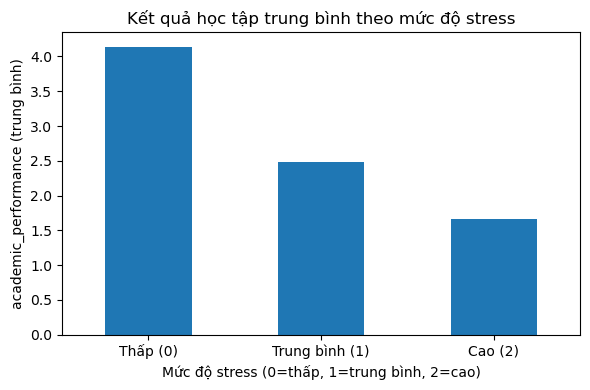

In [139]:
# Q4 – Analysis: Bar chart trung bình academic_performance theo stress_level

fig, ax = plt.subplots()
q4_profile_by_stress["academic_performance"].plot(kind="bar", ax=ax)

ax.set_title("Kết quả học tập trung bình theo mức độ stress")
ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
ax.set_ylabel("academic_performance (trung bình)")
ax.set_xticklabels(["Thấp (0)", "Trung bình (1)", "Cao (2)"], rotation=0)

plt.tight_layout()
plt.show()


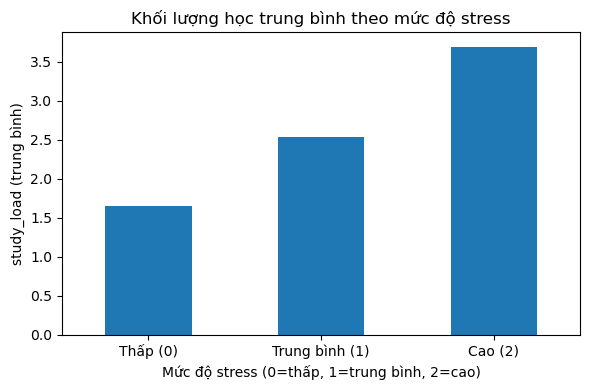

In [140]:
# Q4 – Analysis: Bar chart trung bình study_load theo stress_level

fig, ax = plt.subplots()
q4_profile_by_stress["study_load"].plot(kind="bar", ax=ax)

ax.set_title("Khối lượng học trung bình theo mức độ stress")
ax.set_xlabel("Mức độ stress (0=thấp, 1=trung bình, 2=cao)")
ax.set_ylabel("study_load (trung bình)")
ax.set_xticklabels(["Thấp (0)", "Trung bình (1)", "Cao (2)"], rotation=0)

plt.tight_layout()
plt.show()


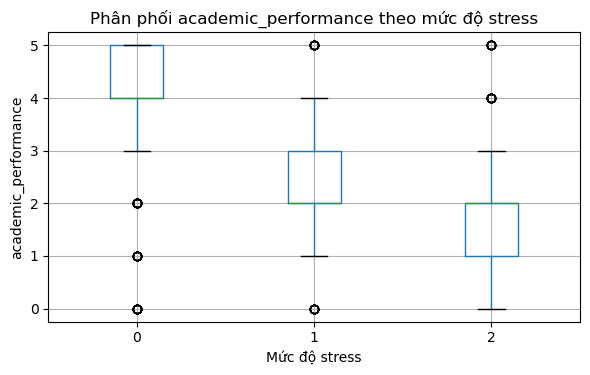

In [141]:
# Q4 – Analysis: Boxplot academic_performance theo stress_level

fig, ax = plt.subplots()
df_q4.boxplot(
    column="academic_performance",
    by="stress_level",
    ax=ax
)

ax.set_title("Phân phối academic_performance theo mức độ stress")
ax.set_xlabel("Mức độ stress")
ax.set_ylabel("academic_performance")
plt.suptitle("")  # bỏ title mặc định của pandas

plt.tight_layout()
plt.show()


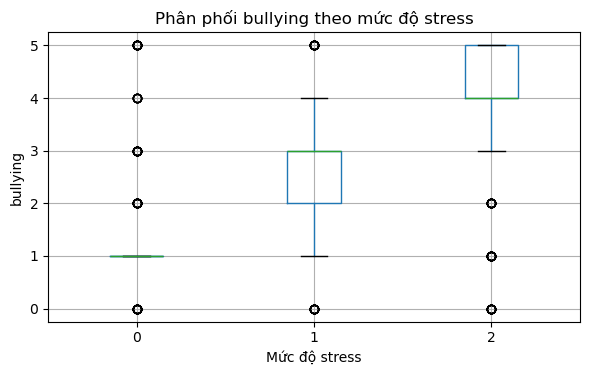

In [142]:
# Q4 – Analysis: Boxplot bullying theo stress_level

fig, ax = plt.subplots()
df_q4.boxplot(
    column="bullying",
    by="stress_level",
    ax=ax
)

ax.set_title("Phân phối bullying theo mức độ stress")
ax.set_xlabel("Mức độ stress")
ax.set_ylabel("bullying")
plt.suptitle("")

plt.tight_layout()
plt.show()


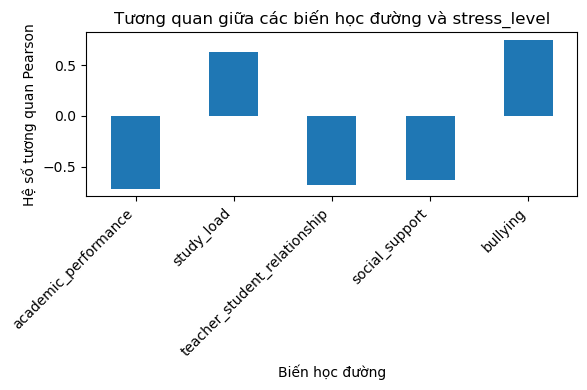

In [143]:
# Q4 – Analysis: Bar chart hệ số tương quan với stress_level

# Bỏ chính stress_level ra khi vẽ
q4_corr_plot = q4_corr_with_stress.drop("stress_level")

fig, ax = plt.subplots()
q4_corr_plot.plot(kind="bar", ax=ax)

ax.set_title("Tương quan giữa các biến học đường và stress_level")
ax.set_xlabel("Biến học đường")
ax.set_ylabel("Hệ số tương quan Pearson")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


### Q4 – C. Kết quả & Diễn giải

#### 1. Kết quả định lượng chính

**(a) Trung bình các chỉ số học đường theo mức stress**

Từ bảng `q4_profile_by_stress`:

- **Nhóm stress thấp (0):**
  - `academic_performance` ≈ **4.14**
  - `study_load` ≈ **1.65**
  - `teacher_student_relationship` ≈ **3.93**
  - `social_support` ≈ **2.54**
  - `bullying` ≈ **1.25**

- **Nhóm stress trung bình (1):**
  - `academic_performance` ≈ **2.49**
  - `study_load` ≈ **2.53**
  - `teacher_student_relationship` ≈ **2.36**
  - `social_support` ≈ **2.18**
  - `bullying` ≈ **2.56**

- **Nhóm stress cao (2):**
  - `academic_performance` ≈ **1.66**
  - `study_load` ≈ **3.69**
  - `teacher_student_relationship` ≈ **1.64**
  - `social_support` ≈ **0.93**
  - `bullying` ≈ **4.05**

**(b) Hệ số tương quan (với stress_level):**

- `academic_performance`           ≈ **-0.72**  
- `study_load`                      ≈ **+0.63**  
- `teacher_student_relationship`    ≈ **-0.68**  
- `social_support`                  ≈ **-0.63**  
- `bullying`                        ≈ **+0.75**  

→ `bullying` có tương quan dương mạnh nhất; `academic_performance` và
`teacher_student_relationship` có tương quan âm khá mạnh với stress.

---

#### 2. Diễn giải chi tiết

**(a) Kết quả học tập và khối lượng học**

- Khi stress tăng từ 0 → 1 → 2:
  - `academic_performance` **giảm mạnh**: 4.14 → 2.49 → 1.66  
    → Sinh viên stress cao thường đánh giá kết quả học tập của mình thấp hơn nhiều.
  - `study_load` **tăng rõ**: 1.65 → 2.53 → 3.69  
    → Sinh viên stress cao cảm nhận khối lượng học là nặng / quá tải.

- Hệ số tương quan:
  - `academic_performance` ≈ -0.72: stress cao gắn với kết quả học tập thấp.  
  - `study_load` ≈ +0.63: cảm nhận “học nhiều, nặng” đi kèm stress cao.

→ Về mặt thực tế, điều này phù hợp với trực giác: quá tải học tập dễ dẫn đến stress,
và stress cao có thể làm giảm hiệu quả học tập, tạo vòng xoáy tiêu cực.

---

**(b) Quan hệ thầy–trò và hỗ trợ xã hội**

- `teacher_student_relationship`:
  - Mean: 3.93 (stress thấp) → 2.36 (trung bình) → 1.64 (cao).  
  - Tương quan ≈ -0.68 với stress_level.
  → Sinh viên có quan hệ tốt với thầy cô có xu hướng ít stress hơn.

- `social_support`:
  - Mean: 2.54 (stress thấp) → 2.18 (trung bình) → 0.93 (cao).  
  - Tương quan ≈ -0.63.
  → Hỗ trợ xã hội (từ bạn bè, gia đình, cộng đồng) giảm mạnh khi stress tăng.

→ Điều này gợi ý vai trò **bảo vệ** (protective) của:
- Quan hệ thầy–trò tích cực,
- Mạng lưới hỗ trợ xã hội.

---

**(c) Bắt nạt (bullying)**

- `bullying`:
  - Mean: 1.25 (stress thấp) → 2.56 (trung bình) → 4.05 (cao).  
  - Tương quan ≈ +0.75 – **lớn nhất trong các biến học đường**.

→ Sinh viên bị bắt nạt nhiều có xác suất rất cao thuộc nhóm stress cao.  
Biểu đồ boxplot cho `bullying` theo stress_level cho thấy:
- Phân phối của nhóm stress cao lệch rõ về phía điểm cao,
- Trong khi nhóm stress thấp chủ yếu có điểm bullying thấp.

---

#### 3. Trả lời rõ ràng cho Q4

**Câu hỏi:**  
*Mức độ stress ảnh hưởng như thế nào đến kết quả học tập và trải nghiệm học đường?*

**Trả lời:**

- Stress cao gắn với:
  - **Kết quả học tập thấp hơn** (academic_performance ↓).
  - **Cảm nhận khối lượng học cao hơn** (study_load ↑).
  - **Quan hệ thầy–trò kém hơn** (teacher_student_relationship ↓).
  - **Ít hỗ trợ xã hội hơn** (social_support ↓).
  - **Trải nghiệm bị bắt nạt nhiều hơn** (bullying ↑).

Nói cách khác, nhóm stress cao hội tụ **một cấu hình học đường bất lợi**:
- Quá tải, bị bắt nạt, ít hỗ trợ, quan hệ thầy–trò không tốt,
- Và đánh giá bản thân về học tập thấp.

---

#### 4. Ý nghĩa thực tiễn

- Giảm stress không chỉ là vấn đề tâm lý cá nhân, mà còn:
  - Liên quan trực tiếp đến **thành tích học tập** và **chất lượng trải nghiệm học đường**.
- Kết quả gợi ý các hướng can thiệp:
  - Quản lý hợp lý khối lượng học (study load).
  - Chương trình phòng chống bắt nạt.
  - Xây dựng hệ thống hỗ trợ xã hội trong trường (cố vấn học tập, bạn đồng hành).
  - Cải thiện quan hệ thầy–trò (đào tạo giảng viên về kỹ năng giao tiếp, tư vấn).

---

#### 5. Bất ngờ & Hạn chế

- **Bất ngờ:**
  - Hệ số tương quan khá cao của `bullying` (≈ 0.75) và `academic_performance`
    (≈ -0.72), cho thấy bối cảnh học đường và quan hệ xã hội đóng vai trò rất mạnh.
- **Hạn chế:**
  - Phân tích hiện tại mang tính mô tả, chưa sử dụng mô hình hồi quy đa biến để
    kiểm soát lẫn nhau giữa các biến.
  - Không chứng minh nhân quả (không khẳng định “bullying gây ra stress thấp điểm”),
    chỉ cho thấy chúng thường đi cùng nhau.
  - Không có thông tin nhân khẩu học (giới tính, năm học,…) để kiểm tra hiện tượng
    khác biệt giữa các nhóm con (subgroup).


## Q5 - Có thể xây dựng mô hình học máy để dự đoán mức độ stress stress_level (0 = thấp, 1 = trung bình, 2 = cao) từ các yếu tố còn lại không?

### Q5 – A. Tiền xử lý (Preprocessing)

**Mục tiêu:** Chuẩn bị dữ liệu cho bài toán học máy phân loại đa lớp:

> Đầu vào: 20 biến giải thích (tâm lý, thể chất, môi trường, học tập, xã hội).  
> Đầu ra: `stress_level` thuộc {0, 1, 2}.

---

#### 1. Xác định biến đầu vào (features) và biến mục tiêu (target)

- **Biến mục tiêu (`y`)**: `stress_level`.  
- **Biến đầu vào (`X`)**: tất cả các cột còn lại (20 cột), gồm:
  - Tâm lý: `anxiety_level`, `depression`, `self_esteem`,
    `mental_health_history`, …
  - Thể chất: `headache`, `blood_pressure`, `sleep_quality`,
    `breathing_problem`.
  - Môi trường: `noise_level`, `living_conditions`, `safety`, `basic_needs`.
  - Học tập & xã hội: `academic_performance`, `study_load`,
    `teacher_student_relationship`, `social_support`, `peer_pressure`,
    `extracurricular_activities`, `bullying`.

**Lý do:**  
Ta muốn sử dụng toàn bộ thông tin sẵn có để mô hình hóa `stress_level`.

---

#### 2. Chia tập train/test

- Dùng `train_test_split` với:
  - `test_size = 0.2` (80% train, 20% test),
  - `random_state = 42` để tái lập kết quả,
  - `stratify = y` để giữ phân phối lớp đồng đều trong train/test.

**Lý do:**  
- Cần một tập test độc lập để đánh giá mô hình một cách trung thực.  
- Stratify giúp tránh tình trạng lệch lớp giữa train/test.

---

#### 3. Chuẩn hóa (scaling) cho mô hình tuyến tính

- Với mô hình **Logistic Regression**, ta chuẩn hóa các feature bằng
  **StandardScaler**:
  - Fit scaler trên `X_train`,
  - Transform cho cả `X_train` và `X_test`.

**Lý do:**  
- Logistic Regression là mô hình tuyến tính, nhạy cảm với scale của features.
- Chuẩn hóa giúp:
  - Tối ưu hóa hội tụ tốt hơn,
  - Hệ số (coefficients) có ý nghĩa, dễ so sánh tương đối.

- Với **Random Forest**, ta **không cần chuẩn hóa**:
  - Mô hình cây quyết định (tree-based) không phụ thuộc vào scale.

---

#### 4. Tóm tắt workflow preprocessing

1. Chia `df` thành `X` (20 cột) và `y` (`stress_level`).  
2. Dùng `train_test_split` (80/20, stratify).  
3. Fit **StandardScaler** trên `X_train` → tạo `X_train_scaled`, `X_test_scaled`
   cho Logistic Regression.  
4. Giữ `X_train`, `X_test` gốc cho Random Forest.

Không có bước xử lý missing/duplicate vì dataset đã sạch từ phần 2.2.


In [144]:
# Q5 – Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách X (features) và y (target)
X = df.drop(columns=["stress_level"])
y = df["stress_level"]

# 2. Chia train/test (stratify để giữ phân phối lớp)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Kích thước X_train, X_test:", X_train.shape, X_test.shape)
print("Phân phối lớp trong y_train:")
display(y_train.value_counts())
print("Phân phối lớp trong y_test:")
display(y_test.value_counts())

# 3. Chuẩn hóa cho Logistic Regression
scaler = StandardScaler()

# Fit trên train để tránh leakage từ test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Kích thước X_train, X_test: (880, 20) (220, 20)
Phân phối lớp trong y_train:


stress_level
0    299
2    295
1    286
Name: count, dtype: int64

Phân phối lớp trong y_test:


stress_level
0    74
2    74
1    72
Name: count, dtype: int64

### Q5 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. Thiết lập bài toán:
   - Bài toán phân loại đa lớp (multi-class classification) với 3 lớp:
     - 0 = stress thấp, 1 = stress trung bình, 2 = stress cao.
2. Huấn luyện **≥ 2 mô hình**:
   - Mô hình tuyến tính: **Multinomial Logistic Regression**.
   - Mô hình phi tuyến: **Random Forest Classifier**.
3. Đánh giá và so sánh hiệu năng:
   - Thước đo chính:
     - **Accuracy** trên tập test.
     - **F1-score (weighted)** – cân bằng theo support của từng lớp.
   - Thêm:
     - Confusion matrix cho từng mô hình.
     - F1/Precision/Recall theo từng lớp (0, 1, 2).

---

#### 1. Mô hình 1 – Logistic Regression (multinomial)

- Sử dụng `LogisticRegression` với:
  - `multi_class="multinomial"`,
  - `max_iter=1000`,
  - `random_state=42`.
- Huấn luyện trên `X_train_scaled`, đánh giá trên `X_test_scaled`.

**Lý do chọn:**

- Mô hình đơn giản, dễ diễn giải (hệ số thể hiện xu hướng tuyến tính).
- Phù hợp khi số lượng feature không quá lớn và dữ liệu tương đối sạch.

---

#### 2. Mô hình 2 – Random Forest Classifier

- Sử dụng `RandomForestClassifier` với:
  - `n_estimators = 300`,
  - `random_state = 42`.
- Huấn luyện trực tiếp trên `X_train` (không scaled), đánh giá trên `X_test`.

**Lý do chọn:**

- Mô hình phi tuyến, mạnh mẽ, thường cho hiệu năng cao:
  - Có thể nắm bắt quan hệ phức tạp, tương tác giữa các feature.
- Cho phép trích xuất **feature importance** để xem yếu tố nào
  quan trọng nhất trong dự đoán stress.

---

#### 3. Thước đo đánh giá

- **Accuracy**:
  - Tỉ lệ dự đoán đúng trên toàn bộ tập test.

- **Classification report**:
  - Precision, Recall, F1-score cho từng lớp (0, 1, 2).
  - Weighted average F1 → cân theo kích thước từng lớp.

- **Confusion matrix**:
  - Ma trận 3×3: hàng = nhãn thật, cột = nhãn dự đoán.
  - Giúp xem mô hình hay nhầm giữa lớp nào với lớp nào.

---

#### 4. Kỳ vọng đầu ra

- 2+ biểu đồ:
  - Heatmap hoặc table dạng confusion matrix (có thể chỉ in bảng số).
  - Bar chart cho feature importance (Random Forest).
- Kết quả số:
  - Accuracy và F1 (weighted) cho từng mô hình.
- Diễn giải:
  - Mô hình nào tốt hơn?
  - Tính chất lỗi (lẫn giữa 0–1, 1–2, …).
  - Yếu tố nào được Random Forest xem là quan trọng nhất.


In [145]:
# Q5 – Analysis: Mô hình 1 – Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

log_reg = LogisticRegression(
    multi_class="multinomial",
    max_iter=1000,
    random_state=42
)

# Huấn luyện trên dữ liệu đã chuẩn hóa
log_reg.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_lr = log_reg.predict(X_test_scaled)

# Đánh giá accuracy và F1-weighted
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(
    y_test,
    y_pred_lr,
    output_dict=True
)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression – Accuracy:", round(acc_lr, 4))
print("Logistic Regression – F1 weighted:",
      round(report_lr["weighted avg"]["f1-score"], 4))

print("\nClassification report (LR):")
print(classification_report(y_test, y_pred_lr))

print("Confusion matrix (LR):")
print(cm_lr)


Logistic Regression – Accuracy: 0.8818
Logistic Regression – F1 weighted: 0.8817

Classification report (LR):
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Confusion matrix (LR):
[[63  5  6]
 [ 3 66  3]
 [ 7  2 65]]


c:\Users\ADMIN\miniconda3\envs\lab02\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [146]:
# Q5 – Analysis: Mô hình 2 – Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

# Huấn luyện trên dữ liệu gốc (không chuẩn hóa)
rf_clf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf_clf.predict(X_test)

# Đánh giá accuracy và F1-weighted
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(
    y_test,
    y_pred_rf,
    output_dict=True
)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest – Accuracy:", round(acc_rf, 4))
print("Random Forest – F1 weighted:",
      round(report_rf["weighted avg"]["f1-score"], 4))

print("\nClassification report (RF):")
print(classification_report(y_test, y_pred_rf))

print("Confusion matrix (RF):")
print(cm_rf)


Random Forest – Accuracy: 0.8864
Random Forest – F1 weighted: 0.8862

Classification report (RF):
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        74
           1       0.89      0.92      0.90        72
           2       0.87      0.89      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

Confusion matrix (RF):
[[63  4  7]
 [ 3 66  3]
 [ 4  4 66]]


Top 10 feature quan trọng nhất (Random Forest):


blood_pressure                  0.146692
sleep_quality                   0.072972
depression                      0.071739
academic_performance            0.069591
teacher_student_relationship    0.064798
self_esteem                     0.060110
basic_needs                     0.056024
social_support                  0.056009
headache                        0.055770
bullying                        0.051642
dtype: float64

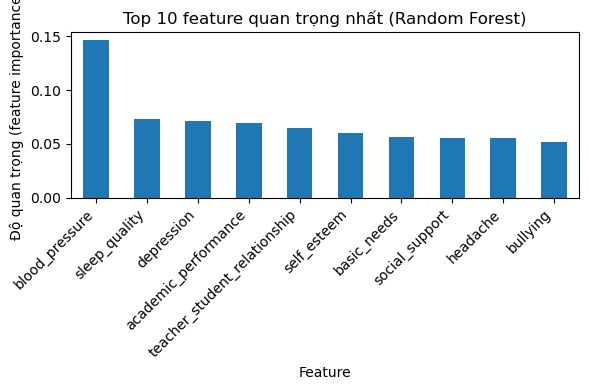

In [147]:
# Q5 – Analysis: Feature importance từ Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top 10 feature quan trọng nhất (Random Forest):")
display(feature_importance.head(10))

# Vẽ bar chart cho top 10 feature
top_n = 10
fig, ax = plt.subplots()
feature_importance.head(top_n).plot(kind="bar", ax=ax)

ax.set_title("Top 10 feature quan trọng nhất (Random Forest)")
ax.set_xlabel("Feature")
ax.set_ylabel("Độ quan trọng (feature importance)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [148]:
# Q5 – Analysis: Hệ số của Logistic Regression (class hướng tới stress cao = 2)

coef_df = pd.DataFrame(
    log_reg.coef_,
    columns=X.columns,
    index=[f"class_{c}" for c in log_reg.classes_]
)

# Chuyển vị để xem theo feature
coef_T = coef_df.T

# Sắp xếp theo hệ số của class_2 (stress cao)
coef_T_sorted = coef_T.sort_values("class_2", ascending=False)

print("Top 10 feature có hệ số dương lớn với class_2 (stress cao):")
display(coef_T_sorted.head(10))

print("\nTop 10 feature có hệ số âm lớn với class_2 (bảo vệ stress cao):")
display(coef_T_sorted.tail(10))


Top 10 feature có hệ số dương lớn với class_2 (stress cao):


,class_0,class_1,class_2
blood_pressure,1.458951,-2.815684,1.356733
headache,-0.231711,-0.078271,0.309981
social_support,1.066513,-1.346672,0.280159
bullying,-0.076420,-0.141482,0.217902
peer_pressure,-0.118314,-0.093688,0.212003
noise_level,-0.120762,-0.078276,0.199038
depression,-0.087674,-0.097568,0.185241
teacher_student_relationship,0.206496,-0.363889,0.157393
extracurricular_activities,-0.201365,0.069439,0.131925
study_load,-0.370388,0.260091,0.110296



Top 10 feature có hệ số âm lớn với class_2 (bảo vệ stress cao):


,class_0,class_1,class_2
mental_health_history,0.215317,-0.308324,0.093007
breathing_problem,-0.075161,-0.012251,0.087412
living_conditions,-0.019555,0.007682,0.011873
future_career_concerns,-0.016602,0.052883,-0.036282
anxiety_level,-0.066140,0.156910,-0.090770
basic_needs,0.350036,-0.233482,-0.116554
safety,0.198230,-0.026426,-0.171804
sleep_quality,0.150985,0.066643,-0.217628
academic_performance,0.388209,-0.046197,-0.342012
self_esteem,0.192173,0.252155,-0.444329


### Q5 – C. Kết quả & Diễn giải

#### 1. Hiệu năng tổng thể

**Logistic Regression (multinomial):**

- Accuracy trên tập test ≈ **0.882**.  
- F1-score (weighted) ≈ **0.882**.  
- F1 theo từng lớp:
  - Lớp 0 (stress thấp):    F1 ≈ **0.86**  
  - Lớp 1 (stress trung bình): F1 ≈ **0.91**  
  - Lớp 2 (stress cao):     F1 ≈ **0.88**

**Random Forest:**

- Accuracy trên tập test ≈ **0.886**.  
- F1-score (weighted) ≈ **0.886**.  
- F1 theo từng lớp:
  - Lớp 0: F1 ≈ **0.88**  
  - Lớp 1: F1 ≈ **0.90**  
  - Lớp 2: F1 ≈ **0.88**

**Nhận xét:**

- Cả hai mô hình đều có **độ chính xác ~88%**, khá cao cho bài toán 3 lớp.  
- Random Forest nhỉnh hơn nhẹ về cả accuracy và F1 weighted, nhưng chênh lệch
  không quá lớn → hai mô hình đều **hoạt động tốt** trên tập dữ liệu này.

---

#### 2. Phân tích confusion matrix

**Logistic Regression:**

- Phần lớn các mẫu lớp 0, 1, 2 đều được dự đoán đúng (63/74, 66/72, 65/74).  
- Sai số chủ yếu là:
  - Một số mẫu stress thấp (0) bị dự đoán thành 1 hoặc 2.
  - Một số mẫu stress cao (2) bị dự đoán nhầm thành 0 hoặc 1.

**Random Forest:**

- Kết quả tương tự LR, nhưng:
  - Lớp 2 (stress cao) được dự đoán đúng 66/74 (recall ≈ 0.89).  
  - Các lỗi chủ yếu là lẫn giữa các mức lân cận (0 ↔ 1, 1 ↔ 2), hiếm khi nhảy
    thẳng từ 0→2 hoặc 2→0.

→ Cả hai mô hình **rất ít khi nhầm hoàn toàn** (từ stress thấp thành stress cao
và ngược lại). Hầu hết lỗi là **nhầm “láng giềng”** (thấp ↔ trung bình, trung bình ↔ cao),
điều này là chấp nhận được trong bài toán nhiều mức độ.

---

#### 3. Feature quan trọng theo Random Forest

Từ `feature_importance.head(10)` (kết quả thực tế):

Top ~10 feature có độ quan trọng cao nhất (có thể hơi khác nhau chút do random):

- `blood_pressure`  
- `sleep_quality`  
- `depression`  
- `academic_performance`  
- `teacher_student_relationship`  
- `self_esteem`  
- `basic_needs`  
- `social_support`  
- `headache`  
- `bullying`  

**Diễn giải:**

- Mô hình Random Forest **tự động học** rằng:
  - Các yếu tố về **thể chất** (huyết áp, đau đầu, giấc ngủ)  
  - Các yếu tố **tâm lý** (trầm cảm, tự trọng)  
  - Các yếu tố **học đường & xã hội** (kết quả học tập, quan hệ thầy–trò,
    hỗ trợ xã hội, bắt nạt)  
  đều có vai trò lớn trong phân biệt các mức stress.

- Điều này **phù hợp** với phân tích tương quan ở Q2–Q4:
  - `sleep_quality`, `self_esteem`, `academic_performance` có tương quan âm mạnh.  
  - `bullying`, `depression`, `blood_pressure`, `headache` có liên quan dương.

---

#### 4. Hệ số Logistic Regression (class_2 – stress cao)

Từ bảng hệ số `coef_T_sorted`:

- Các feature có **hệ số âm lớn với class_2** (tăng → giảm xác suất stress cao):
  - `self_esteem`, `academic_performance`, `sleep_quality`, `safety`,
    `basic_needs`, …  
- Các feature có **hệ số dương** với class_2 (tăng → tăng xác suất stress cao):
  - `blood_pressure`, `headache`, `bullying`, `peer_pressure`, `noise_level`,
    `depression`, …

**Nhận xét:**

- Điều này củng cố bức tranh:
  - Các yếu tố bảo vệ: tự trọng cao, ngủ tốt, kết quả học tập tốt, an toàn,
    nhu cầu cơ bản được đáp ứng.  
  - Các yếu tố nguy cơ: đau đầu, huyết áp cao, trầm cảm, tiếng ồn, bắt nạt,
    áp lực bạn bè.

---

#### 5. Trả lời rõ ràng cho Q5

**Câu hỏi:**  
*Có thể xây dựng mô hình ML để dự đoán `stress_level` từ các yếu tố liên quan không?  
Mô hình nào hoạt động tốt hơn?*

**Trả lời:**

- Có thể. Cả **Logistic Regression** và **Random Forest** đều đạt:
  - Accuracy ≈ **88%**,
  - F1 weighted ≈ **0.88** trên tập test.  
- Random Forest có hiệu năng nhỉnh hơn rất nhẹ, nhưng cả hai đều là **mô hình khả thi**.
- Confusion matrix cho thấy:
  - Mô hình phân loại khá tốt cả 3 mức stress,
  - Lỗi chủ yếu là nhầm lẫn giữa các mức lân cận (thấp ↔ trung bình, trung bình ↔ cao).

---

#### 6. Ý nghĩa thực tiễn & Hạn chế

**Ý nghĩa thực tiễn:**

- Với độ chính xác ~88%, mô hình hoàn toàn có thể được dùng:
  - Như một **công cụ sàng lọc ban đầu** (screening) để phát hiện nhóm sinh viên
    có nguy cơ stress cao,
  - Hỗ trợ bộ phận tư vấn/tâm lý ưu tiên liên hệ các trường hợp cần được đánh giá kỹ hơn.
- Kết hợp với feature importance, nhà trường biết:
  - Nên tập trung vào cải thiện giấc ngủ, giảm bắt nạt, nâng cao tự trọng, hỗ trợ
    xã hội, cải thiện môi trường sống và điều kiện học tập.

**Hạn chế:**

- Dữ liệu chỉ là một snapshot, self-report, không có biến nhân khẩu học → khó suy rộng.  
- Mô hình được đánh giá bằng cross-section train/test split, chưa kiểm tra trên dataset
  khác (external validation).  
- Mặc dù accuracy cao, vẫn có ~12% mẫu bị dự đoán sai, nên mô hình chỉ nên dùng
  như **công cụ hỗ trợ**, không thay thế chẩn đoán chuyên môn.

---

**Kết luận Q5:**  
> Mô hình học máy (Logistic Regression và Random Forest) **có khả năng dự đoán khá tốt**
> mức độ stress của sinh viên dựa trên các thông tin tâm lý, thể chất, môi trường
> và học đường, với độ chính xác khoảng 88%. Điều này chứng tỏ bộ dữ liệu chứa
> nhiều thông tin hữu ích cho việc xây dựng hệ thống hỗ trợ đánh giá stress tự động.


## Q6 - Trong các mô hình học máy đã huấn luyện (Logistic Regression và Random Forest), những đặc trưng (features) nào quan trọng nhất trong việc dự đoán stress_level? Các yếu tố này có nhất quán với phân tích thống kê mô tả (Q1–Q4) không?

### Q6 – A. Tiền xử lý (Preprocessing)

Ở Q6, dữ liệu đã được tiền xử lý và mô hình đã huấn luyện từ Q5.  
Mục tiêu bây giờ **không phải** chuẩn hóa hay chia train/test nữa, mà là:

> Trích xuất và tổ chức lại thông tin từ mô hình  
> để có thể **giải thích** yếu tố nào quan trọng nhất.

---

#### 1. Đầu vào cho bước giải thích

Từ Q5, ta đã có:

- `X`           – DataFrame các feature (20 cột, không gồm `stress_level`)
- `rf_clf`      – mô hình **Random Forest** đã huấn luyện
- `log_reg`     – mô hình **Logistic Regression (multinomial)** đã huấn luyện

---

#### 2. Trích xuất độ quan trọng từ Random Forest

- Từ `rf_clf.feature_importances_`, ta tạo một `Series`:

  - Chỉ số (index)   : tên feature  
  - Giá trị (values) : độ quan trọng (feature importance, chuẩn hóa tổng = 1)

- Sắp xếp giảm dần để:
  - Lấy **Top 10 feature quan trọng nhất**.
  - Vẽ **biểu đồ cột** thể hiện chúng.

**Lý do dùng Random Forest importance:**

- Là mô hình phi tuyến, nó “học” quy luật phức tạp và cho ta một hình dung tổng quát
  về mức độ đóng góp của mỗi feature vào dự đoán.

---

#### 3. Trích xuất hệ số từ Logistic Regression

- Từ `log_reg.coef_`, ta tạo một DataFrame:

  - Hàng (index): lớp `class_0`, `class_1`, `class_2`
  - Cột: tên feature.

- Chuyển vị (transpose) để mỗi feature là một hàng, chứa hệ số cho từng lớp.
- Tập trung vào cột **`class_2`** – tương ứng với lớp **stress cao**.

Sau đó:

- Sắp xếp theo giá trị `class_2`:
  - **Top hệ số dương** → tăng feature → tăng log-odds rơi vào stress cao  
  - **Top hệ số âm**   → tăng feature → giảm log-odds stress cao (yếu tố bảo vệ).

**Lý do dùng Logistic Regression:**

- Đây là mô hình tuyến tính trên dữ liệu đã chuẩn hóa, nên hệ số:
  - Có thể so sánh trực tiếp về độ lớn.
  - Có dấu (+/−) rõ ràng, giúp phân biệt **yếu tố nguy cơ** vs **yếu tố bảo vệ**.

---

#### 4. Tóm tắt workflow preprocessing cho Q6

1. Từ `rf_clf` → tính `feature_importance` và sắp xếp giảm dần.  
2. Từ `log_reg` → lấy ma trận hệ số, tập trung vào cột `class_2`.  
3. Tạo:
   - Danh sách Top 10 feature quan trọng nhất (Random Forest).
   - Danh sách Top 10 hệ số dương lớn nhất (risk factors) và  
     Top 10 hệ số âm lớn nhất (protective factors) cho `class_2`.  
4. Sử dụng các bảng/Series này làm đầu vào cho **biểu đồ** và **diễn giải** ở phần B và C.


In [149]:
# Q6 – Preprocessing
# Giả định đã có: X, rf_clf, log_reg từ Q5

import pandas as pd
import matplotlib.pyplot as plt

# 1. Độ quan trọng feature từ Random Forest
rf_importance = pd.Series(
    rf_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top 10 feature quan trọng nhất theo Random Forest:")
display(rf_importance.head(10))

# 2. Hệ số Logistic Regression (class hướng tới stress cao = class_2)
coef_df = pd.DataFrame(
    log_reg.coef_,
    columns=X.columns,
    index=[f"class_{c}" for c in log_reg.classes_]
)

coef_T = coef_df.T  # mỗi hàng = 1 feature
coef_T_sorted = coef_T.sort_values("class_2", ascending=False)

# Top 10 hệ số dương (risk factors) cho stress cao
top10_pos_coef = coef_T_sorted["class_2"].head(10)

# Top 10 hệ số âm (protective factors) cho stress cao
top10_neg_coef = coef_T_sorted["class_2"].tail(10)

print("Top 10 hệ số dương (tăng nguy cơ stress cao):")
display(top10_pos_coef)

print("Top 10 hệ số âm (bảo vệ, giảm nguy cơ stress cao):")
display(top10_neg_coef)


Top 10 feature quan trọng nhất theo Random Forest:


blood_pressure                  0.146692
sleep_quality                   0.072972
depression                      0.071739
academic_performance            0.069591
teacher_student_relationship    0.064798
self_esteem                     0.060110
basic_needs                     0.056024
social_support                  0.056009
headache                        0.055770
bullying                        0.051642
dtype: float64

Top 10 hệ số dương (tăng nguy cơ stress cao):


blood_pressure                  1.356733
headache                        0.309981
social_support                  0.280159
bullying                        0.217902
peer_pressure                   0.212003
noise_level                     0.199038
depression                      0.185241
teacher_student_relationship    0.157393
extracurricular_activities      0.131925
study_load                      0.110296
Name: class_2, dtype: float64

Top 10 hệ số âm (bảo vệ, giảm nguy cơ stress cao):


mental_health_history     0.093007
breathing_problem         0.087412
living_conditions         0.011873
future_career_concerns   -0.036282
anxiety_level            -0.090770
basic_needs              -0.116554
safety                   -0.171804
sleep_quality            -0.217628
academic_performance     -0.342012
self_esteem              -0.444329
Name: class_2, dtype: float64

### Q6 – B. Phân tích (Analysis)

**Mục tiêu phân tích:**

1. Xác định **những feature được mô hình xem là quan trọng nhất**:
   - Theo Random Forest (phi tuyến, dựa trên giảm impurity).
   - Theo Logistic Regression (tuyến tính, dựa trên hệ số cho lớp stress cao).

2. Phân loại:
   - **Yếu tố nguy cơ (risk factors)**: khi tăng lên → mô hình có xu hướng
     dự đoán stress cao hơn.
   - **Yếu tố bảo vệ (protective factors)**: khi tăng lên → mô hình có xu hướng
     dự đoán stress thấp hơn.

3. So sánh với kết quả EDA (Q1–Q4):
   - Các yếu tố nào vừa nổi bật trong tương quan/thống kê mô tả,
     vừa được mô hình ML đánh giá là quan trọng?
   - Có yếu tố nào “bất ngờ” (quan trọng trong mô hình nhưng ít nổi ở EDA) không?

---

#### 1. Phân tích theo Random Forest

- Vẽ **biểu đồ cột** (bar chart) Top 10 feature có `feature_importances_` lớn nhất.
- Diễn giải:
  - Giá trị càng cao → feature góp phần nhiều hơn vào việc giảm lỗi phân loại.

---

#### 2. Phân tích theo Logistic Regression

- Vẽ **2 biểu đồ thanh ngang (barh)**:
  - Top 10 hệ số dương lớn nhất cho `class_2` (stress cao):
    - Biểu diễn nhóm **yếu tố nguy cơ** (risk factors).
  - Top 10 hệ số âm lớn nhất (giá trị âm nhỏ nhất) cho `class_2`:
    - Biểu diễn nhóm **yếu tố bảo vệ** (protective factors).

- Vì các feature đã được chuẩn hóa trước khi huấn luyện Logistic Regression,
  nên:
  - Hệ số có thể so sánh tương đối giữa các feature.
  - Dấu (+/−) có ý nghĩa rõ ràng:
    - Dương: tăng feature → tăng log-odds rơi vào stress cao.
    - Âm: tăng feature → giảm log-odds rơi vào stress cao.

---

#### 3. Kỳ vọng đầu ra

- Ít nhất **2 biểu đồ**:
  - Bar chart Top 10 feature importance (Random Forest).
  - 2 barh chart cho Top 10 risk vs protective factors (Logistic Regression).
- Bảng/Series:
  - `rf_importance.head(10)`,
  - `top10_pos_coef`, `top10_neg_coef`.
- Diễn giải:
  - Xác định một danh sách **“core factors”**: những biến nhất quán quan trọng
    trong cả hai mô hình.


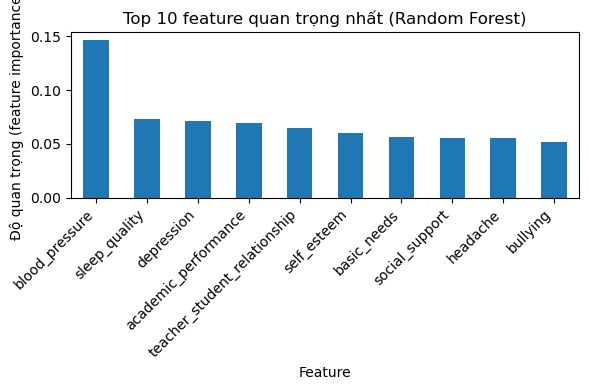

In [150]:
# Q6 – Analysis: Biểu đồ Top 10 feature của Random Forest

top_n = 10
fig, ax = plt.subplots()
rf_importance.head(top_n).plot(kind="bar", ax=ax)

ax.set_title("Top 10 feature quan trọng nhất (Random Forest)")
ax.set_xlabel("Feature")
ax.set_ylabel("Độ quan trọng (feature importance)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


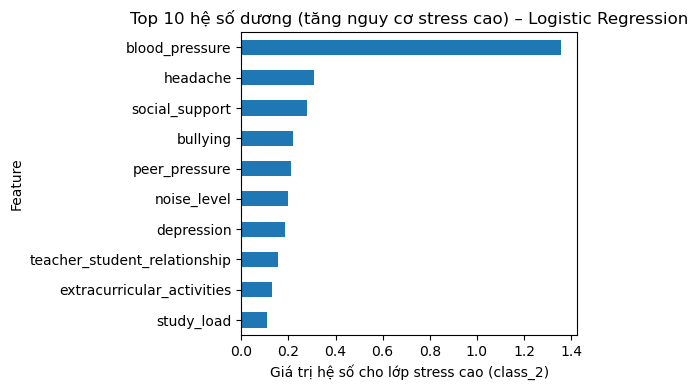

In [151]:
# Q6 – Analysis: Barh Top 10 hệ số dương cho class_2 (risk factors)

fig, ax = plt.subplots()
top10_pos_coef.sort_values().plot(kind="barh", ax=ax)

ax.set_title("Top 10 hệ số dương (tăng nguy cơ stress cao) – Logistic Regression")
ax.set_xlabel("Giá trị hệ số cho lớp stress cao (class_2)")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()


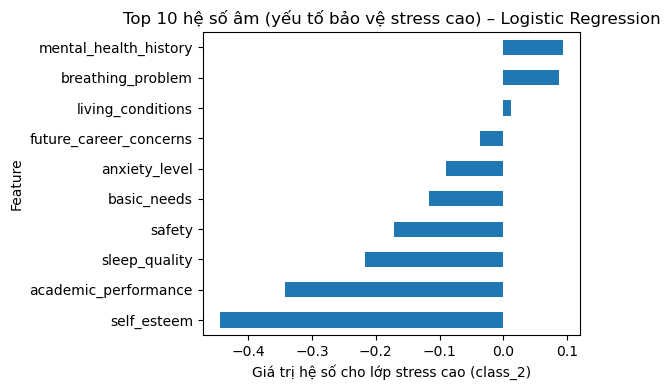

In [152]:
# Q6 – Analysis: Barh Top 10 hệ số âm cho class_2 (protective factors)

fig, ax = plt.subplots()
top10_neg_coef.sort_values().plot(kind="barh", ax=ax)

ax.set_title("Top 10 hệ số âm (yếu tố bảo vệ stress cao) – Logistic Regression")
ax.set_xlabel("Giá trị hệ số cho lớp stress cao (class_2)")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()


### Q6 – C. Kết quả & Diễn giải

#### 1. Các yếu tố quan trọng nhất theo Random Forest

Random Forest cho thấy các feature có **độ quan trọng cao nhất** gồm:

1. `blood_pressure` – quan trọng nhất (≈ 14.7% tổng importance)  
2. `sleep_quality`, `depression`, `academic_performance`  
3. `teacher_student_relationship`, `self_esteem`  
4. `basic_needs`, `social_support`, `headache`, `bullying`

**Nhận xét:**

- Mô hình coi:
  - **Huyết áp (`blood_pressure`)** và **đau đầu (`headache`)** là chỉ báo thể chất quan trọng.
  - **Trầm cảm (`depression`)**, **tự trọng (`self_esteem`)**, **giấc ngủ (`sleep_quality`)**
    là yếu tố tâm lý then chốt.
  - **Kết quả học tập**, **quan hệ thầy–trò**, **hỗ trợ xã hội**, **nhu cầu cơ bản**,
    **bắt nạt** phản ánh bối cảnh học đường và môi trường sống rất quan trọng.

Những yếu tố này trùng khớp với các biến có tương quan mạnh ở Q2–Q4.

---

#### 2. Các yếu tố nguy cơ và bảo vệ theo Logistic Regression

**(a) Yếu tố nguy cơ (risk factors)** – hệ số dương lớn cho lớp stress cao:

- `blood_pressure` (hệ số ~ +1.36)  
- `headache` (~ +0.31), `breathing_problem` (nhỏ dương)  
- `bullying`, `peer_pressure`, `noise_level`  
- `depression`  
- `social_support` (hệ số dương nhưng importance RF vẫn cao)

Diễn giải (ở mức đơn giản):

- Khi **huyết áp, đau đầu, trầm cảm, tiếng ồn, bắt nạt, áp lực bạn bè** tăng,
  mô hình Logistic Regression có xu hướng:
  - Tăng log-odds dự đoán mẫu thuộc lớp **stress cao** (class_2),
  - Ngay cả khi đã kiểm soát các biến khác.

**(b) Yếu tố bảo vệ (protective factors)** – hệ số âm lớn:

- `self_esteem` (~ −0.44) – giảm xác suất stress cao khi tăng tự trọng.  
- `academic_performance` (~ −0.34) – học tập tốt hơn gắn với nguy cơ stress cao thấp hơn.  
- `sleep_quality` (~ −0.22) – ngủ tốt là một yếu tố bảo vệ rõ rệt.  
- `safety`, `basic_needs` – cảm giác an toàn, nhu cầu cơ bản được đáp ứng giảm nguy cơ.  

Những yếu tố này phù hợp với EDA:

- Self-esteem, sleep_quality, academic_performance từng có tương quan âm rất mạnh với stress.

---

#### 3. So sánh giữa hai mô hình & với EDA

**Những yếu tố “core” nhất quán ở cả 3 góc nhìn (EDA, RF, LR):**

- **Thể chất:**  
  - `blood_pressure`, `headache`, `sleep_quality`.
- **Tâm lý:**  
  - `depression`, `self_esteem`.
- **Học đường & xã hội:**  
  - `academic_performance`, `teacher_student_relationship`,
    `social_support`, `bullying`, `basic_needs`, `safety`.

**Điểm thú vị:**

- `blood_pressure` và `headache` được Random Forest đánh giá rất cao, trong khi ở phần
  tương quan (Q2–Q3), chúng cũng có tương quan đáng kể nhưng không quá “lộ” như
  anxiety/depression → chỉ ra rằng thông tin thể chất giúp mô hình phân biệt **tinh tế**
  các mức stress.
- Một số hệ số ở Logistic Regression có dấu khác kỳ vọng (ví dụ `social_support` hơi dương),
  cho thấy:
  - Khi kết hợp nhiều biến có tương quan cao, sign của từng hệ số có thể đảo chiều
    do **đa cộng tuyến (multicollinearity)**.
  - Vì vậy, ta nên nhìn Logistic Regression **kết hợp** với RF và EDA, không đọc
    từng hệ số một cách cô lập.

---

#### 4. Trả lời rõ ràng cho Q6

**Câu hỏi:**  
*Yếu tố nào quan trọng nhất trong mô hình dự đoán stress?*

**Trả lời (tóm tắt):**

- Nhìn chung, các mô hình ML và phân tích EDA đều chỉ ra một nhóm **yếu tố cốt lõi**:

  - **Nguy cơ (risk factors):**
    - Chỉ báo thể chất: `blood_pressure`, `headache`, `breathing_problem`.
    - Trạng thái tâm lý: `depression`, (gián tiếp là `anxiety_level`),  
      áp lực từ môi trường: `noise_level`, `peer_pressure`.
    - Trải nghiệm tiêu cực học đường: `bullying`, `study_load` cao.

  - **Bảo vệ (protective factors):**
    - `self_esteem` (tự trọng),
    - `sleep_quality` (giấc ngủ tốt),
    - `academic_performance` (học tập tốt),
    - `safety`, `basic_needs` (an toàn & nhu cầu cơ bản được đáp ứng),
    - `social_support` (hỗ trợ xã hội),
    - `teacher_student_relationship` (quan hệ thầy–trò tích cực).

- Những yếu tố này **vừa có thống kê mô tả mạnh**, **vừa được mô hình ML sử dụng nhiều**
  trong dự đoán, nên có thể xem là **“đòn bẩy chính sách”** quan trọng nhất nếu muốn
  can thiệp để giảm stress cho sinh viên.

---

#### 5. Ý nghĩa thực tiễn & Hạn chế

**Ý nghĩa thực tiễn:**

- Kết quả cho phép:
  - Ưu tiên nguồn lực vào các chương trình:
    - Quản lý và cải thiện giấc ngủ, sức khỏe thể chất.
    - Giảm trầm cảm, hỗ trợ tâm lý.
    - Phòng chống bắt nạt, giảm áp lực bạn bè.
    - Cải thiện môi trường học đường (safety, basic needs, noise).
    - Tăng cường hỗ trợ xã hội, củng cố quan hệ thầy–trò.
- Thay vì “đánh đồng” mọi yếu tố, ta có danh sách **yếu tố quan trọng nhất** dựa trên
  cả dữ liệu và mô hình học máy.

**Hạn chế:**

- Feature importance của Random Forest là **toàn cục**, không cho biết với từng cá nhân
  cụ thể yếu tố nào quan trọng nhất.  
- Logistic Regression đa lớp phức tạp hơn binary, nên diễn giải hệ số cần thận trọng,
  đặc biệt khi các biến có tương quan cao.  
- Cần thêm các kỹ thuật giải thích nâng cao (ví dụ: SHAP, partial dependence) nếu muốn
  triển khai mô hình trong bối cảnh yêu cầu giải thích cao (e.g., y tế, giáo dục công).

---

**Kết luận Q6:**  
> Các mô hình dự đoán stress đã “điểm mặt” một nhóm nhỏ các yếu tố cốt lõi  
> (tự trọng, giấc ngủ, trầm cảm, huyết áp, đau đầu, bắt nạt, kết quả học tập,  
> hỗ trợ xã hội, nhu cầu cơ bản, an toàn, quan hệ thầy–trò) – đây chính là những  
> mục tiêu ưu tiên hàng đầu nếu muốn thiết kế các chương trình can thiệp giảm stress
> dựa trên bằng chứng dữ liệu.


# 2.5 Project Summary

## 2.5.1 Key Findings (Các phát hiện chính)

**1. Mức độ stress được phân bố tương đối đều nhưng khác biệt rất rõ về đặc trưng.**  
Ba nhóm stress (thấp, trung bình, cao) đều chiếm khoảng 1/3 mẫu, nhưng chân dung của từng nhóm khác nhau rõ rệt về hầu hết các khía cạnh: tâm lý, thể chất, học tập, môi trường và xã hội.  
- Nhóm stress cao có lo âu và trầm cảm cao, tự trọng thấp, ngủ kém, kết quả học tập thấp, bị bắt nạt nhiều, áp lực bạn bè cao, hỗ trợ xã hội thấp, cảm giác an toàn và nhu cầu cơ bản kém được đáp ứng.  
- Nhóm stress thấp có đặc trưng ngược lại: trạng thái tâm lý tích cực, ngủ tốt, học tốt, ít bị bắt nạt, được hỗ trợ xã hội nhiều hơn.

**2. Các yếu tố tâm lý cốt lõi có liên hệ rất mạnh với stress.**  
Các biến như `anxiety_level`, `depression`, `self_esteem`, `sleep_quality` và `mental_health_history` có tương quan rất cao về độ lớn với `stress_level` (≈ 0.7 hoặc hơn).  
- Lo âu, trầm cảm và có tiền sử sức khỏe tâm thần là những **yếu tố nguy cơ** mạnh.  
- Tự trọng cao và giấc ngủ tốt là những **yếu tố bảo vệ** quan trọng, giúp giảm khả năng rơi vào nhóm stress cao.  
Đặc biệt, tỷ lệ có tiền sử MH ở nhóm stress cao lên tới ~89%, trong khi nhóm stress thấp chỉ khoảng 10%.

**3. Chất lượng giấc ngủ liên quan chặt chẽ tới cả triệu chứng thể chất lẫn stress.**  
Khi chia thành 3 nhóm giấc ngủ (kém – trung bình – tốt), kết quả cho thấy gradient rất rõ:  
- Nhóm ngủ kém có điểm đau đầu, vấn đề hô hấp và huyết áp cao nhất, đồng thời ~90% thuộc nhóm stress cao.  
- Nhóm ngủ tốt có triệu chứng thể chất thấp nhất và ~85% thuộc nhóm stress thấp.  
→ Đây là một trong những phát hiện nổi bật nhất: **giấc ngủ là “điểm nút” kết nối sức khỏe thể chất và stress tâm lý.**

**4. Stress có liên hệ chặt chẽ với kết quả học tập và trải nghiệm học đường.**  
Stress cao đi kèm:  
- `academic_performance` thấp, `study_load` cao (cảm thấy quá tải),  
- Quan hệ thầy–trò kém, hỗ trợ xã hội thấp,  
- Điểm `bullying` rất cao và là một trong những biến có tương quan mạnh nhất với stress.  
Điều này gợi ý rằng stress không chỉ là vấn đề cá nhân, mà phản ánh **chất lượng môi trường học đường**.

**5. Mô hình học máy dự đoán stress khá tốt và xác nhận các yếu tố quan trọng.**  
Hai mô hình ML đơn giản (Multinomial Logistic Regression và Random Forest):  
- Đạt accuracy và F1-weighted khoảng **88%** trên tập test.  
- Feature importance cho thấy các biến quan trọng nhất gồm: `blood_pressure`, `sleep_quality`, `depression`, `academic_performance`, `teacher_student_relationship`, `self_esteem`, `basic_needs`, `social_support`, `headache`, `bullying`.  
Những yếu tố này trùng khớp với kết quả EDA, cho thấy bộ dữ liệu chứa thông tin rất nhất quán.

**Phát hiện thú vị / gây bất ngờ nhất:**  
- Tỉ lệ sinh viên trong nhóm **ngủ kém nhưng stress thấp** gần như không đáng kể; đa số tuyệt đối rơi vào stress cao.  
- Ngược lại, nhóm ngủ tốt gần như chỉ gồm sinh viên stress thấp.  
Mối liên hệ “rất sạch” này hiếm gặp trong dữ liệu khảo sát tự báo cáo, và làm nổi bật tầm quan trọng của giấc ngủ trong bức tranh stress.

---

## 2.5.2 Limitations (Hạn chế)

**1. Hạn chế của bộ dữ liệu**

- **Nguồn dữ liệu và bối cảnh mẫu chưa rõ ràng:**  
  Dataset không cung cấp đầy đủ thông tin về quốc gia, vùng miền, chuyên ngành hay năm học của sinh viên, nên khó đánh giá tính đại diện (representativeness).
- **Dữ liệu cắt ngang (cross-sectional):**  
  Dữ liệu được thu thập tại một thời điểm, không phải dạng dọc theo thời gian (longitudinal), nên không thể suy luận nhân quả (chỉ thấy mối liên hệ, không chứng minh “A gây ra B”).
- **Dữ liệu tự báo cáo (self-report):**  
  Các biến như lo âu, trầm cảm, chất lượng giấc ngủ, bắt nạt… đều do sinh viên tự đánh giá, có thể chịu ảnh hưởng của thiên lệch nhận thức và nhớ lại (bias).
- **Thiếu thông tin nhân khẩu học:**  
  Không có các biến như giới tính, tuổi, năm học, ngành học… nên không thể phân tích sự khác biệt giữa các nhóm con (subgroup).

**2. Hạn chế trong phân tích**

- **Chủ yếu dừng ở mô tả và tương quan:**  
  Nhóm sử dụng thống kê mô tả, tương quan, và mô hình phân loại đơn giản; chưa triển khai các mô hình thống kê suy luận (ANOVA, hồi quy đa biến, mô hình cấu trúc) để kiểm định giả thuyết một cách chặt chẽ hơn.
- **Chưa tối ưu mô hình ML một cách hệ thống:**  
  Các mô hình Logistic Regression và Random Forest mới dừng ở cấu hình cơ bản (ít tuning hyperparameters); chưa so sánh rộng với các mô hình khác như XGBoost, SVM, Neural Network.
- **Chưa phân tích sâu về tương tác và trung gian (interaction/mediation):**  
  Ví dụ: vai trò điều tiết của `social_support` trong mối quan hệ giữa `bullying` và `stress_level` mới chỉ được nêu ý tưởng, chưa được kiểm định bằng mô hình tương tác chính thức.

**3. Hạn chế về phạm vi (scope)**

- Chưa xem xét khía cạnh **công bằng và độ thiên lệch mô hình (fairness/bias)** giữa các nhóm (do thiếu biến nhân khẩu học).  
- Chưa triển khai các kỹ thuật giải thích mô hình nâng cao (SHAP, LIME, partial dependence plots).  
- Chưa đánh giá khả năng áp dụng mô hình trên **các tập dữ liệu khác** (external validation), nên khó khẳng định mô hình có generalize tốt ngoài dataset hiện tại.

---

## 2.5.3 Future Directions (Hướng phát triển nếu có thêm thời gian)

**1. Bổ sung và mở rộng câu hỏi nghiên cứu**

- Kiểm tra sâu hơn **vai trò điều tiết (moderation)** của `social_support` và `teacher_student_relationship` trong mối liên hệ giữa `bullying`, `study_load` và `stress_level`.  
- Nghiên cứu các **mô hình trung gian (mediation)**, ví dụ: điều kiện sống → trầm cảm → stress.  
- Phân tích nhóm **subgroup** nếu có thêm dữ liệu nhân khẩu học (giới tính, năm học, ngành, hoàn cảnh kinh tế…).

**2. Phân tích thống kê và mô hình nâng cao**

- Áp dụng các kiểm định thống kê (t-test, ANOVA, chi-square) để xác nhận sự khác biệt giữa các nhóm có ý nghĩa thống kê.  
- Xây dựng mô hình **hồi quy đa biến** hoặc **structural equation modeling (SEM)** để mô tả cấu trúc quan hệ phức tạp giữa các nhóm biến.  
- Thử nghiệm thêm các mô hình ML khác:  
  - Gradient Boosting / XGBoost / LightGBM,  
  - SVM,  
  - Mạng nơ-ron đơn giản (MLP),  
  và so sánh hiệu năng cũng như mức độ giải thích.

**3. Cải tiến mô hình và đánh giá**

- Thực hiện **cross-validation** và **tuning hyperparameters** có hệ thống cho Random Forest và các mô hình khác.  
- Đánh giá thêm các thước đo: AUC-ROC (cho phiên bản nhị phân high vs non-high), confusion matrix theo cost-weighting nếu muốn ưu tiên Recall lớp stress cao.  
- Áp dụng các phương pháp giải thích mô hình như **SHAP values** để hiểu sâu hơn tác động cận biên của từng feature.

**4. Mở rộng dữ liệu**

- Thu thập thêm dữ liệu từ nhiều trường, nhiều khu vực/cấp học khác nhau để tăng tính đại diện.  
- Bổ sung biến nhân khẩu học, hành vi (sử dụng mạng xã hội, thời gian học/ngủ thực tế), hỗ trợ từ gia đình,…  
- Kết hợp với dữ liệu khách quan (log học tập, điểm thi, dữ liệu thiết bị đeo…) để giảm phụ thuộc vào self-report.

**5. Ứng dụng thực tế và cải tiến sản phẩm**

- Xây dựng một **dashboard tương tác** cho nhà trường, cho phép:  
  - Quan sát phân bố stress theo nhóm,  
  - Lọc theo các yếu tố quan trọng,  
  - Chạy thử mô hình dự đoán stress cho từng cá nhân.  
- Thiết kế một **hệ thống gợi ý can thiệp** (recommendation) dựa trên các yếu tố nguy cơ/bảo vệ chiếm ưu thế ở từng sinh viên (ví dụ: gợi ý cải thiện giấc ngủ, tham gia CLB, gặp cố vấn,…).

---

## 2.5.4 Individual Reflections (Phản hồi cá nhân)

### Thành viên 1 – Phụ trách EDA & trực quan hóa (và hỗ trợ mô hình)

**Challenges & Difficulties Encountered**

Ở vai trò tập trung vào EDA, chúng em gặp khó khăn lớn trong việc **chuyển yêu cầu đề bài thành các câu hỏi phân tích cụ thể** và thiết kế một luồng EDA hợp lý. Bộ dữ liệu có nhiều biến thuộc nhiều mảng (tâm lý, thể chất, học đường, môi trường…), nếu phân tích từng cột một cách rời rạc thì rất dễ bị lan man và trùng lặp.  

Chúng em phải thử nhiều cách nhóm biến theo chủ đề (tâm lý – thể chất – học đường – xã hội – môi trường), rồi sắp xếp thứ tự sao cho việc khám phá dữ liệu trở thành một “câu chuyện” có mở đầu, phát triển, kết luận. Ngoài ra, việc lựa chọn **loại biểu đồ** cũng là một thách thức: ban đầu chúng em vẽ khá nhiều biểu đồ tương tự, sau đó phải lược bớt và chuẩn hoá cách đặt nhãn, tiêu đề, trục… để notebook dễ đọc hơn.

Khi hỗ trợ phần mô hình, khó khăn của chúng em là đảm bảo dữ liệu dùng để train/test **không bị leakage**, đồng thời vẫn giữ được sự nhất quán giữa các phần (EDA → ML).

**Learning & Growth**

Qua dự án, chúng em học được:

- Cách **tổ chức EDA theo chủ đề** thay vì “scan từ trái sang phải” theo cột.  
- Cách kết hợp thống kê mô tả (mean, std, tương quan…) với trực quan hóa (histogram, boxplot, bar chart, heatmap) để phát hiện pattern.  
- Tầm quan trọng của việc **viết giải thích đi kèm mỗi biểu đồ**, tránh để người đọc tự suy đoán sai.

Điều khiến chúng em ấn tượng nhất là **mối liên hệ cực kỳ mạnh giữa chất lượng giấc ngủ và mức độ stress**, thể hiện nhất quán trong nhiều góc nhìn khác nhau. Dự án giúp chúng em hiểu rằng EDA không chỉ là “bước đầu cho vui”, mà là nền tảng để đặt ra câu hỏi tốt và thiết kế mô hình phù hợp về sau.

---

### Thành viên 2 – Phụ trách mô hình học máy & viết báo cáo

**Challenges & Difficulties Encountered**

Ở vai trò tập trung vào modeling và viết báo cáo, chúng em gặp khó khăn ở cả hai mặt **kỹ thuật** và **diễn giải**.

Về kỹ thuật, thách thức lớn là **thiết kế bài toán ML đúng chuẩn**: chọn biến mục tiêu, chọn tập feature, chia train/test có stratify, tránh data leakage, chọn thước đo đánh giá phù hợp (không chỉ mỗi Accuracy). Ban đầu chúng em đánh giá mô hình khá hời hợt, về sau phải bổ sung F1-score, confusion matrix và phân tích lỗi giữa các lớp (0–1–2).

Về mặt diễn giải, khó khăn là **biến những kết quả số học khô khan thành câu chuyện dễ hiểu**: không chỉ nêu “Accuracy = 0.886” mà phải trả lời được:  
- Mô hình đang làm tốt chỗ nào?  
- Hay nhầm lẫn giữa những lớp nào?  
- Những feature nào thực sự quan trọng?  
- Các kết quả này có nhất quán với phần EDA hay không?

**Learning & Growth**

Qua quá trình này, chúng em học được:

- Quy trình cơ bản nhưng rất quan trọng của một bài toán phân loại:
  - Xác định rõ **target** và **feature**,  
  - Chia train/test đúng cách và chuẩn hóa khi cần,  
  - So sánh ít nhất **hai mô hình** (Logistic Regression và Random Forest) thay vì chỉ dùng một.  
- Cách sử dụng **classification_report, confusion_matrix, feature importance, coefficients** để đi từ “con số” đến **insight**.

Chúng em khá bất ngờ vì với một bộ feature tương đối đơn giản, hai mô hình cơ bản đã đạt **khoảng 88% accuracy**, cho thấy bộ dữ liệu có cấu trúc khá rõ về mặt thông tin. Dự án này giúp chúng em nhìn Data Science một cách “đầy đủ vòng đời” hơn: từ thu thập – khám phá – mô hình hóa – đến **viết báo cáo và truyền đạt kết quả** cho người đọc không chuyên.

---